*Sjekk først at du har installert pakkene riktig ved å kjøre kodeblokken under:*

In [2]:
from graph_utils.graph import Graph, nx, plt
from graph_utils.buss_graph import BussGraph
from graph_utils.tree_graph import TreeGraph
from graph_utils.ring_graph import RingGraph
from graph_utils.star_graph import StarGraph
from graph_utils.grid_graph import GridGraph
from graph_utils.mesh_graph import MeshGraph
from graph_utils.constructed_graph import ConstructedGraph
from graph_utils.watts_strogatz import WattsStrogatz
from graph_utils.barabasi_albert import BarabasiAlbert
from graph_utils.real_network_graph import RealNetworkGraph
from graph_utils.vdes_graph import VDESGraph
from graph_utils.get_network import get_network
import matplotlib
import numpy as np
import random as r

*Gå nøye gjennom Introduksjonsnotebooken før du gjør øvingen. Alle verktøy du vil trenge presenteres der.*

In [3]:
student_seed = 10027 #ALso student with student_seed: 10064

# Introduksjon
I denne øvingen skal vi lære om ulike måter å måle viktigheten, eller sentraliteten, til en node i et nettverk. Vi skal også se på ulike graftyper, lære enkel analyse og til slutt se på tilfeldige og målrettede feil i et nettverk.

Følgende temaer er forventet at du skal kunne etter denne øvingen:
* Sentraliteter
* Mål på sammenkobling av nettverk
    * Noder i største partisjon
* Angrepsmål i et nettverk
    * Viktigheten av en node
    * Angrepsstrategier i nettverk
* Robusthet/utholdenhet
    * Redundans
* Kostnad ved redundans/trade-offs og effekten av dette




For å gjennomføre denne øvingen forventes det at man har gjennomført introduksjonen, og kan bruke verktøyene som ble introdusert der til mer krevende oppgaver. For oppgavene nedenfor forventes det at studenten klarer å svare kort og konkret.

# Del 1: Grafstrukturer og centralities
I denne delen skal vi introdusere mål på viktigheten for en node i et nettverk. Her skal vi lære om tre forskjellige standariserte mål: 
* degree centrality
* betweenness centrality
* closeness centrality. 

Vi skal også ta en nærmere titt på ulike graftyper og analysere deres fordeler og ulemper.

## Oppgave 1.1
Enkle grafstrukturer som er mye brukt er mesh, star, ring, tree og bus. Ved hjelp av metodene introdusert i introduksjonen, konstruer og print en enkel versjon av hver graf (5-10 noder).

<em> Her forventer vi å se de fem graftypene konstruert og printet </em>

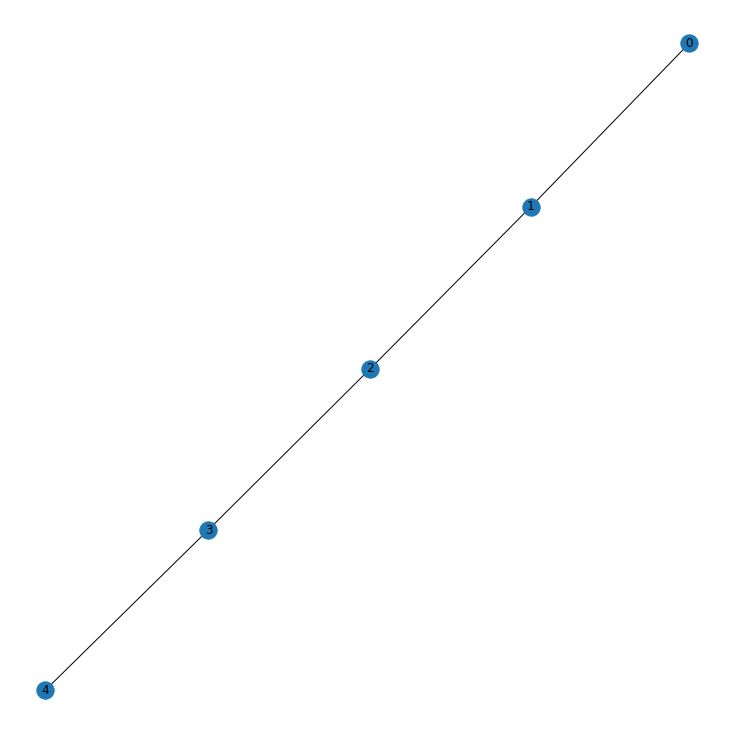

In [9]:
#Bus
BussGraph(5).draw()

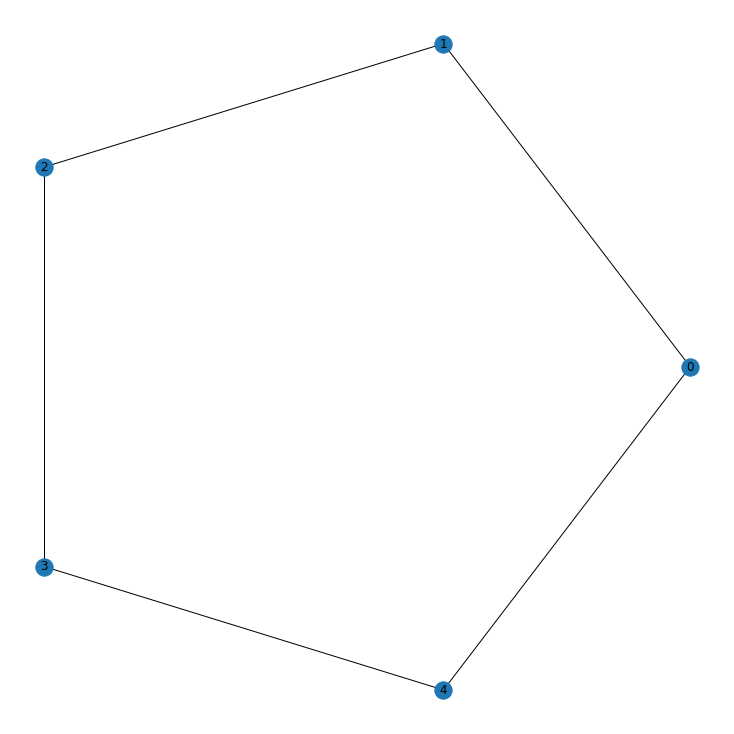

In [5]:
#Ring
RingGraph(5).draw()

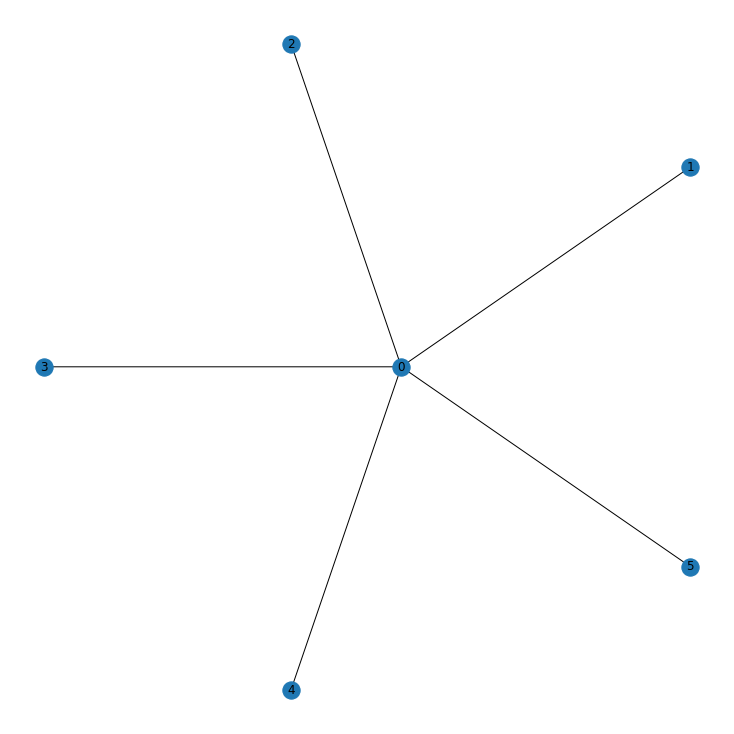

In [6]:
#Star
StarGraph(5).draw()

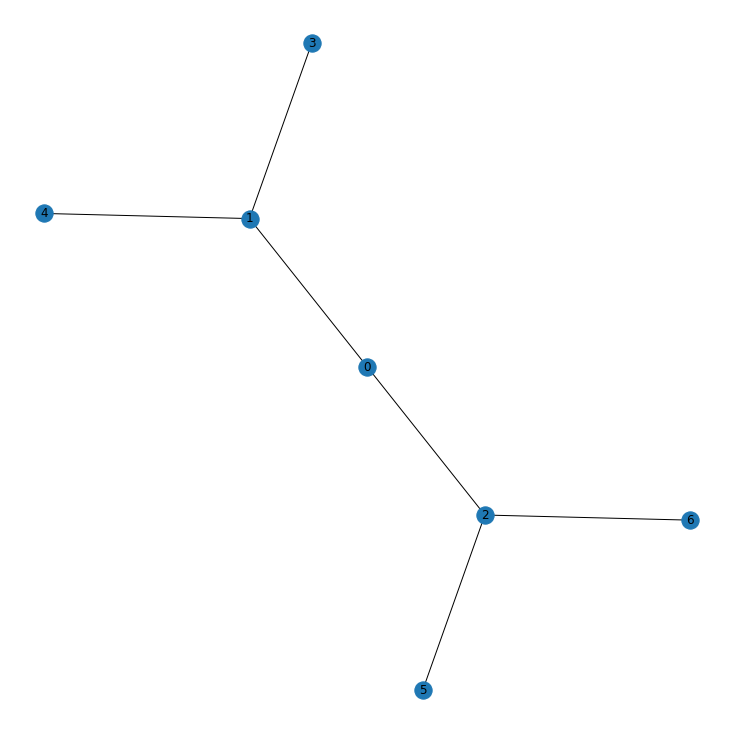

In [6]:
#Tree
TreeGraph(2,2).draw()

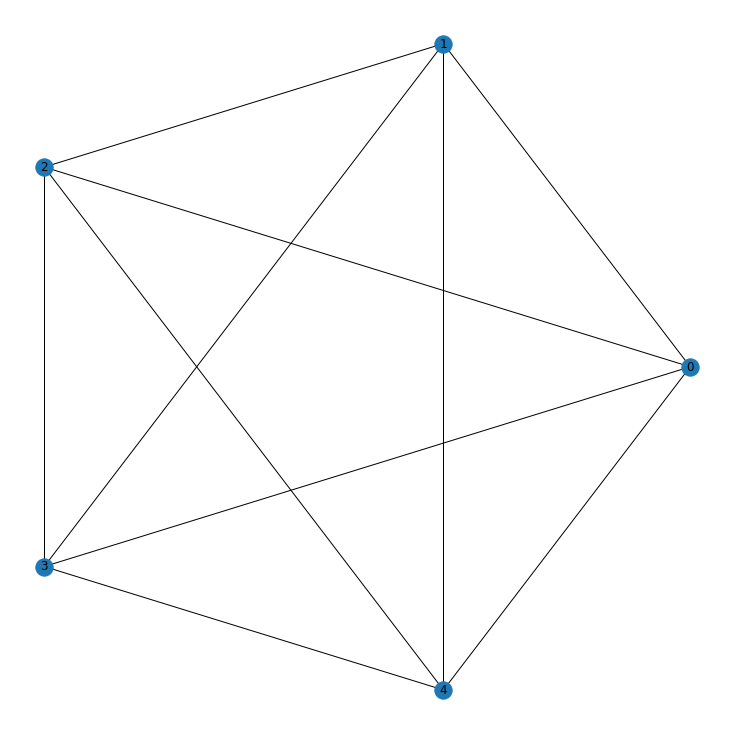

In [7]:
#Mesh
MeshGraph(5).draw()

## Oppgave 1.2
For hver av strukturene gitt i oppgave 1.1, kom med et eksempel fra virkeligheten som bruker denne strukturen. For hver av strukturene, kommenter hva som er styrker og svakheter.

<em> For hver graf forventer vi å se minst ett eksempel på hvor denne strukturen brukes. Vi forventer også en kort drøftning på styrker og svakheter </em>

# Skriv svar her:

## BussGraph
I en et lineært BussGraph-nettverk er alle eneheten koblet til samme ryggrad eller buss, bestående av en 
nettverks-kabel eller lignenende. 

### Eksempel: Ethernet
Det mest relevante eksempelet idag vil være et tradisjonel ethernet nettverk, som kan betegnes som et "Local Area Network"(LAN). I et slikt nettverk vil enhver pakke bli sendt til alle enhetene i nettverket, med en MAC-adresse til mottaker. Dermed vil bare datamaskinen med den gitte MAC-Adressen behandle pakken. 


### Styrker:
* Krever mindre ressurser med tanke på opsett, altså færre kabler.
* Enkelt å sette opp og konfigurere
* En feil i en enhet reduserer ikke ytelsen av resten av nettverket, annet enn dens egen funskjon. 

### Svakheter
* Om ryggraden av nettverket feiler, kollapser hele nettverket.
* Ekstremt sakte i forhold til andre typer nettverk, ikke brukbart i stor skala.
* Ytelsen reduseres om en legger til flere enheter i nettverket.



## RingGraph

Ring graf viser en nettverk av noder som alle har nøyaktig 2 kanter, og man kan alltid "flytte" på nodene slik at det ser ut som en ring, som kalles ring topologi.

### Eksempel: Token Passing
En type MAC-protokoll som ble brukt i datanettverk før var "Token passing".
Dette protokollet eliminerer kollisjoner i kommunikasjon-nettverket mellom datmaskiner ved at en såkalt "token" ble
gitt rundt, som tillot en gitt enheten å være den eneste med tilgang til å sende informasjon over kanalen. Denne "Token" går på rundgang i nettverket for å få en lik fordeling mellom alle de gitte enhetene. 

### Styrker
* Om en node feiler er det lett å detektere at det er en feil fordi grafen ikke lenger vil ha en sykel
* Jevn fordeling av kanter på nodene

### Svakheter
* Om man en node feiler kan det risikere å ødelegge hele nettverket om man ikke har gode protokoller for det.
* I Token passing vil Token alltid blir sendt rundt til alle nodene, selv om en node ikke skal sende noe data, dette bidrar til unødvendig bruk av resurser.
* Om man skal legge til / fjerne, kan det påvirke de andre ende-systemene fordi man er nødt til å finne en ny ring før *Token*3 kan sendes videre 


## StarGraph

En slikt nettverke er et utelukkende sentralt nettverk der en har én node med en til alle relasjon som en kaller "hub", og resten av nodene har én til én relasjon til huben. 

### Eksempel: LAN Switch
I de flest LAN nettverk i dag, brukes en switch som kan sees på som en hub, som kommuniserer med alle ende-systemene. At all trafikk går gjennom en hub kan være veldig oversiktlig og elegant, men om huben feiler, vil hele nettverket kollapse. Å sikre at huben både tåler belastningen av nettverket og er robust, er sentralt for å kunne benytte seg av en slik metode. 

### Styrker
* Enkelt og billig å sette opp
* Hvis et ende-system feiler, vil det ikke ha noe negativ påvirkning på de andre ende-systemene
* Det går veldig raskt om det er lav datatrafikk, fordi man kan sende data med én gang inn til hubben uten å måtte vente på f.eks. en Token

### Svakheter
* Kan være sårbart med et så sentralt nettverk; Feiler huben, kollapser hele nettet.
* Høy trafikk kan redusere ytelsen av nettverket betydelig.
* Kostbart å installere nettverket.


## TreeGraph
I et slikt nettverk har man en rotnode som blir ekspandert på av resten av nettverket på en hierarkisk måte. 

### Eksempel :

### Styrker
* Lettvint å ekspandere nettverket
* Feil-håndtering er også lettvint

### Svakheter
* Hvis rotnoden feiler, kollapser hele nettverket
* Vanskelig å konfigurere 


## MeshGraph
I et Mesh-nettverk er korteste vei mellom en til alle enehtene 1 kant, og en har mange muligheter for å nå samme punkt. Det gjør dermed Mesh til en svært robust måte å bygge nettverk på. 

### Eksempel Peer-To-Peer:
P2P-nettverk har en desentralisert struktur der enhver enhet er "likverdige". I et slikt nettverk deler man ressurser og igjen arbeid mot nettverkets "formål". I et slikt nettverk er ofte hver node både bruker og leverandør, som igjen gjør det svært robust. 

### Styrker
* Svært pålitleig kommunikasjon over nettverket. Om en kant eller node feiler vil det det være en alternativ vei å lever pakken.
* Vanskelig å overbelaste nettverket da det er mange koblinger.

### Svakheter
* Kostbart å bygge nettverket, samt at det er vanskelig å konfigurere.
* Kostbart å legge til flere enheter i nettverket.
* Krever svært mye fysisk infrastruktur om en gjør det lokalt. Krav om mye kabler, porter og ikke minst plass.

## Oppgave 1.3
For hver graf, finn noden med høyest degree centrality for hånd. Vis utregning og forklar viktigheten en node med høy degree centrality tilføyer nettverket.

<em> Her forventer vi å se at man har forstått seg på hva begrepet degree centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode. Til slutt forventer vi en kort kommentar på hvorfor denne noden er viktig.</em>

## BussGraph
$$\text{Formelen for degree centrality for hver node er:}$$

$$\frac{(\text{antall kanter noden har})}{(\text{antal noder i grafen - 1})}$$

$$\text{Node}_0 = \frac{1}{5 - 1} \implies \frac{1}{4} \implies \underline{\underline{ 0.25}}$$

$$\text{Node}_1 = \frac{2}{5 - 1} \implies \frac{2}{4} \implies \underline{\underline{ 0.5}}$$

$$\text{Node}_2 = \frac{2}{5 - 1} \implies \frac{2}{4} \implies \underline{\underline{ 0.5}}$$

$$\text{Node}_3 = \frac{2}{5 - 1} \implies \frac{2}{4} \implies \underline{\underline{ 0.5}}$$

$$\text{Node}_4 = \frac{1}{5 - 1} \implies \frac{1}{4} \implies \underline{\underline{ 0.25}}$$

Her ser vi at node 1,2 og 3 har høyest degree centrality på 0.5 i denne grafen er det vitig at disse nodene ikke feiler, fordi om de feiler deler vi nettverket i 2 partisjoner (regionalnett).

## RingGraph
$$\text{Formelen for degree centrality for hver node er:}$$

$$\frac{(\text{antall kanter noden har})}{(\text{antal noder i grafen - 1})}$$

$$\text{Node}_0 = \frac{2}{5 - 1} \implies \frac{2}{4} \implies \underline{\underline{ 0.5}}$$

$$\text{Node}_1 = \frac{2}{5 - 1} \implies \frac{2}{4} \implies \underline{\underline{ 0.5}}$$

$$\text{Node}_2 = \frac{2}{5 - 1} \implies \frac{2}{4} \implies \underline{\underline{ 0.5}}$$

$$\text{Node}_3 = \frac{2}{5 - 1} \implies \frac{2}{4} \implies \underline{\underline{ 0.5}}$$

$$\text{Node}_4 = \frac{2}{5 - 1} \implies \frac{2}{4} \implies \underline{\underline{ 0.5}}$$

Her ser vi at alle nodene har like stor degree centrality på 0.5 fordi i en ringgraf vi alle nodene ha to kanter.


## StarGraph
$$\text{Formelen for degree centrality for hver node er:}$$

$$\frac{(\text{antall kanter noden har})}{(\text{antal noder i grafen - 1})}$$

$$\text{Node}_0 = \frac{5}{6 - 1} \implies \frac{5}{5} \implies \underline{\underline{ 1.0}}$$

$$\text{Node}_1 = \frac{1}{6 - 1} \implies \frac{1}{5} \implies \underline{\underline{ 0.2}}$$

$$\text{Node}_2 = \frac{1}{6 - 1} \implies \frac{1}{5} \implies \underline{\underline{ 0.2}}$$

$$\text{Node}_3 = \frac{1}{6 - 1} \implies \frac{1}{5} \implies \underline{\underline{ 0.2}}$$

$$\text{Node}_4 = \frac{1}{6 - 1} \implies \frac{1}{5} \implies \underline{\underline{ 0.2}}$$

$$\text{Node}_5 = \frac{1}{6 - 1} \implies \frac{1}{5} \implies \underline{\underline{ 0.2}}$$

Her ser vi at det er én node med vesentrlig høyere degree centraliy på 1, som er den høyeste verdien man kan ha, som vil se at den har alle kantene i grafen. om denne node feiler vil alle kantene "forsvinne" og ingen node i nettverket vil kunne kommunisere med hverandre.

## TreeGraph: 
$$\text{Formelen for degree centrality for hver node er:}$$

$$\frac{(\text{antall kanter noden har})}{(\text{antal noder i grafen - 1})}$$

$$\text{Node}_0 = \frac{2}{7 - 1} \implies \frac{2}{6} \implies \underline{\underline{ 0.33}}$$

$$\text{Node}_1 = \frac{3}{7 - 1} \implies \frac{3}{6} \implies \underline{\underline{ 0.5}}$$

$$\text{Node}_2 = \frac{3}{7 - 1} \implies \frac{3}{6} \implies \underline{\underline{ 0.5}}$$

$$\text{Node}_3 = \frac{1}{7 - 1} \implies \frac{1}{6} \implies \underline{\underline{ 0.17}}$$

$$\text{Node}_4 = \frac{1}{7 - 1} \implies \frac{1}{6} \implies \underline{\underline{ 0.17}}$$

$$\text{Node}_5 = \frac{1}{7 - 1} \implies \frac{1}{6} \implies \underline{\underline{ 0.17}}$$

$$\text{Node}_6 = \frac{1}{7 - 1} \implies \frac{1}{6} \implies \underline{\underline{ 0.17}}$$

Her ser vi at det er 2 noder med høyes degree centrality på 0.5, disse nodene i dette tillfellet er essensielle fordi, de kobler alle nodene sammen og uten disse to vil det ikke være noen kanter igjen i nettverket.


## MeshGraph
$$\text{Formelen for degree centrality for hver node er:}$$

$$\frac{(\text{antall kanter noden har})}{(\text{antal noder i grafen - 1})}$$

$$\text{Node}_0 = \frac{4}{5 - 1} \implies \frac{4}{4} \implies \underline{\underline{ 1.0}}$$

$$\text{Node}_1 = \frac{4}{5 - 1} \implies \frac{4}{4} \implies \underline{\underline{ 1.0}}$$

$$\text{Node}_2 = \frac{4}{5 - 1} \implies \frac{4}{4} \implies \underline{\underline{ 1.0}}$$

$$\text{Node}_3 = \frac{4}{5 - 1} \implies \frac{4}{4} \implies \underline{\underline{ 1.0}}$$

$$\text{Node}_4 = \frac{4}{5 - 1} \implies \frac{4}{4} \implies \underline{\underline{ 1.0}}$$

Her har alle nodene en maks-score på 1 i degree centrality, som vil si at alle nodene i grafen har en direkte til hverandre. viktigheten til én av disse nodene forsvinner litt da, fordi uansett hvilken node man fjerner, vil fortsatt alle nodene har degree centrality på 1, og fortsatt kunne kommunisere med direkte med alle de andre nodene.

## Oppgave 1.4
For hver graf, finn noden med høyest betweenness centrality for hånd. Vis utregning og forklar viktigheten en node med høy degree centrality tilføyer nettverket.

<em> Her forventer vi å se at man har forstått seg på hva begrepet betweenness centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode. Til slutt forventer vi en kort kommentar på hvorfor denne noden er viktig</em>

## Betweenness centrality for BussGraph

$$\text{Formelen betweenness centrality for en node er:}$$

$$\frac{\text{Antall ganger noden er i en korteste sti mellom alle nodepar}}{\frac{\text{(antall noder - 1)(antall noder - 2)}}{2}}$$

$$\text{Node}_0:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(5-1)*(5-2)}{2}} \implies \frac{0*2}{12} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_1:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(0, 2), (0, 3), (0, 4)] \implies 3 $$ 

$$ \frac{3}{\frac{(5-1)*(5-2)}{2}} \implies \frac{3*2}{12} \implies \underline{\underline{ 0.5 }}$$

$$\text{Node}_2:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(0, 3), (0, 4), (1, 3), (1, 4)] \implies 4 $$ 

$$ \frac{4}{\frac{(5-1)*(5-2)}{2}} \implies \frac{4*2}{12} \implies \underline{\underline{ 0.67 }}$$

$$\text{Node}_3:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(0, 4), (1, 4), (2, 4)] \implies 3 $$ 

$$ \frac{3}{\frac{(5-1)*(5-2)}{2}} \implies \frac{3*2}{12} \implies \underline{\underline{ 0.5 }}$$

$$\text{Node}_4:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(5-1)*(5-2)}{2}} \implies \frac{0*2}{12} \implies \underline{\underline{ 0.0 }}$$

Her ser vi at det er én node som har høyest betweenness centrality på 0.67. Dette er fordi det er noden i midten av bussen, og da gir det mening at den noden er inkludert i flest stier. Viktigheten til den noden er stor på grunn av nettopp dette.


## Betweenness centrality for RingGraph

$$\text{Formelen betweenness centrality for en node er:}$$

$$\frac{\text{Antall ganger noden er i en korteste sti mellom alle nodepar}}{\frac{\text{(antall noder - 1)(antall noder - 2)}}{2}}$$

$$\text{Node}_0:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(1, 4)] \implies 1 $$ 

$$ \frac{1}{\frac{(5-1)*(5-2)}{2}} \implies \frac{1*2}{12} \implies \underline{\underline{ 0.17 }}$$

$$\text{Node}_1:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(0, 2)] \implies 1 $$ 

$$ \frac{1}{\frac{(5-1)*(5-2)}{2}} \implies \frac{1*2}{12} \implies \underline{\underline{ 0.17 }}$$

$$\text{Node}_2:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(1, 3)] \implies 1 $$ 

$$ \frac{1}{\frac{(5-1)*(5-2)}{2}} \implies \frac{1*2}{12} \implies \underline{\underline{ 0.17 }}$$

$$\text{Node}_3:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(2, 4)] \implies 1 $$ 

$$ \frac{1}{\frac{(5-1)*(5-2)}{2}} \implies \frac{1*2}{12} \implies \underline{\underline{ 0.17 }}$$

$$\text{Node}_4:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(0, 3)] \implies 1 $$ 

$$ \frac{1}{\frac{(5-1)*(5-2)}{2}} \implies \frac{1*2}{12} \implies \underline{\underline{ 0.17 }}$$

Her ser vi at alle nodene i ringgrafen har lik betweenness centrality på 0.17 bare, dette er et ganske lavt tall siden betweenness centrality gir en standarisert score mellom 0 og 1.


## Betweenness centrality for StarGraph

$$\text{Formelen betweenness centrality for en node er:}$$

$$\frac{\text{Antall ganger noden er i en korteste sti mellom alle nodepar}}{\frac{\text{(antall noder - 1)(antall noder - 2)}}{2}}$$

$$\text{Node}_0:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] \implies 10 $$ 

$$ \frac{10}{\frac{(6-1)*(6-2)}{2}} \implies \frac{10*2}{20} \implies \underline{\underline{ 1.0 }}$$

$$\text{Node}_1:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(6-1)*(6-2)}{2}} \implies \frac{0*2}{20} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_2:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(6-1)*(6-2)}{2}} \implies \frac{0*2}{20} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_3:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(6-1)*(6-2)}{2}} \implies \frac{0*2}{20} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_4:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(6-1)*(6-2)}{2}} \implies \frac{0*2}{20} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_5:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(6-1)*(6-2)}{2}} \implies \frac{0*2}{20} \implies \underline{\underline{ 0.0 }}$$

Her ser vi at alle nodene har betweenness centrality på 0, unatt en node som har betweenness centrality på 1, dette er en vedlig sentral node i grafen. Siden alle andre noder har betweenness centrality på 0, vil det si at node 0 er den eneste som kan være med i stien uten at den er start- eller ende-noden.

## Betweenness centrality for TreeGraph

$$\text{Formelen betweenness centrality for en node er:}$$

$$\frac{\text{Antall ganger noden er i en korteste sti mellom alle nodepar}}{\frac{\text{(antall noder - 1)(antall noder - 2)}}{2}}$$

$$\text{Node}_0:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(1, 2), (1, 5), (1, 6), (2, 3), (2, 4), (3, 5), (3, 6), (4, 5), (4, 6)] \implies 9 $$ 

$$ \frac{9}{\frac{(7-1)*(7-2)}{2}} \implies \frac{9*2}{30} \implies \underline{\underline{ 0.6 }}$$

$$\text{Node}_1:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(0, 3), (0, 4), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6)] \implies 9 $$ 

$$ \frac{9}{\frac{(7-1)*(7-2)}{2}} \implies \frac{9*2}{30} \implies \underline{\underline{ 0.6 }}$$

$$\text{Node}_2:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [(0, 5), (0, 6), (1, 5), (1, 6), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)] \implies 9 $$ 

$$ \frac{9}{\frac{(7-1)*(7-2)}{2}} \implies \frac{9*2}{30} \implies \underline{\underline{ 0.6 }}$$

$$\text{Node}_3:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(7-1)*(7-2)}{2}} \implies \frac{0*2}{30} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_4:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(7-1)*(7-2)}{2}} \implies \frac{0*2}{30} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_5:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(7-1)*(7-2)}{2}} \implies \frac{0*2}{30} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_6:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(7-1)*(7-2)}{2}} \implies \frac{0*2}{30} \implies \underline{\underline{ 0.0 }}$$

Her er det 3 noder med betweenness centrality på 0.6, mens resten av nodene har betweenness centrality på 0. Da vil disse nodene være veldig viktige når det kommer til stier mellom nodene. mens de på 0 vil ikke ha noen betydning når det kommer til å danne stier videre.

## Betweenness centrality for MeshGraph

$$\text{Formelen betweenness centrality for en node er:}$$

$$\frac{\text{Antall ganger noden er i en korteste sti mellom alle nodepar}}{\frac{\text{(antall noder - 1)(antall noder - 2)}}{2}}$$

$$\text{Node}_0:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(5-1)*(5-2)}{2}} \implies \frac{0*2}{12} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_1:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(5-1)*(5-2)}{2}} \implies \frac{0*2}{12} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_2:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(5-1)*(5-2)}{2}} \implies \frac{0*2}{12} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_3:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(5-1)*(5-2)}{2}} \implies \frac{0*2}{12} \implies \underline{\underline{ 0.0 }}$$

$$\text{Node}_4:$$ 
$$\text{Korteste veiene noden er i:}$$

$$ [] \implies 0 $$ 

$$ \frac{0}{\frac{(5-1)*(5-2)}{2}} \implies \frac{0*2}{12} \implies \underline{\underline{ 0.0 }}$$

Her ser vi fort at alle nodene har betweenness centrality på 0. Dette kommer av at alle nodene har en direkte sti til hverandre, og derfor trenger man ikke å bruke andre noder til å finne korteste sti til en annen node. Det vil også si at nodene ikke er viktige når det kommer til å finne stier til andre noder.

## Oppgave 1.5
For hver graf, finn noden med høyest closeness centrality for hånd. Vis utregning og forklar viktigheten en node med høy degree centrality tilføyer nettverket.

<em> Her forventer vi å se at man har forstått seg på hva begrepet closeness centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode. Til slutt forventer vi en kort kommentar på hvorfor denne noden er viktig</em>

## Closesness centrality for BussGraph: 
$$\text{Formelen for closesness centrality for en node er:}$$


$$\frac{\text{Antall noder - 1}}{\text{Den totale avstanden fra den noden til alle andre noder}}$$


**Node 0**, den korteste veien til hver node:

Korteste vei fra 0 til 1 = [1] = 1 

Korteste vei fra 0 til 2 = [1, 2] = 2 

Korteste vei fra 0 til 3 = [1, 2, 3] = 3 

Korteste vei fra 0 til 4 = [1, 2, 3, 4] = 4 

Den totale lengden: 10
$$\text{Closeness centrality} = \frac{5 - 1}{10} \implies \frac{4}{10} \implies\underline{\underline{ 0.4 }}$$


**Node 1**, den korteste veien til hver node:

Korteste vei fra 1 til 0 = [0] = 1 

Korteste vei fra 1 til 2 = [2] = 1 

Korteste vei fra 1 til 3 = [2, 3] = 2 

Korteste vei fra 1 til 4 = [2, 3, 4] = 3 

Den totale lengden: 7
$$\text{Closeness centrality} = \frac{5 - 1}{7} \implies \frac{4}{7} \implies\underline{\underline{ 0.57 }}$$


**Node 2**, den korteste veien til hver node:

Korteste vei fra 2 til 0 = [1, 0] = 2 

Korteste vei fra 2 til 1 = [1] = 1 

Korteste vei fra 2 til 3 = [3] = 1 

Korteste vei fra 2 til 4 = [3, 4] = 2 

Den totale lengden: 6
$$\text{Closeness centrality} = \frac{5 - 1}{6} \implies \frac{4}{6} \implies\underline{\underline{ 0.67 }}$$


**Node 3**, den korteste veien til hver node:

Korteste vei fra 3 til 0 = [2, 1, 0] = 3 

Korteste vei fra 3 til 1 = [2, 1] = 2 

Korteste vei fra 3 til 2 = [2] = 1 

Korteste vei fra 3 til 4 = [4] = 1 

Den totale lengden: 7
$$\text{Closeness centrality} = \frac{5 - 1}{7} \implies \frac{4}{7} \implies\underline{\underline{ 0.57 }}$$


**Node 4**, den korteste veien til hver node:

Korteste vei fra 4 til 0 = [3, 2, 1, 0] = 4 

Korteste vei fra 4 til 1 = [3, 2, 1] = 3 

Korteste vei fra 4 til 2 = [3, 2] = 2 

Korteste vei fra 4 til 3 = [3] = 1 

Den totale lengden: 10
$$\text{Closeness centrality} = \frac{5 - 1}{10} \implies \frac{4}{10} \implies\underline{\underline{ 0.4 }}$$

Noden med høyest closeness centrality er node 2, og dette kommer av at den er i midten av bussgrafen og har da kortest totale vei. Det vil si at den vil i snitt ha kortere vei til en tilfeldig node i grafen.

## Closesness centrality for RingGraph: 

$$\text{Formelen for closesness centrality for en node er:}$$


$$\frac{\text{Antall noder - 1}}{\text{Den totale avstanden fra den noden til alle andre noder}}$$


**Node 0**, den korteste veien til hver node:

Korteste vei fra 0 til 1 = [1] = 1 

Korteste vei fra 0 til 2 = [1, 2] = 2 

Korteste vei fra 0 til 3 = [4, 3] = 2 

Korteste vei fra 0 til 4 = [4] = 1 

Den totale lengden: 6
$$\text{Closeness centrality} = \frac{5 - 1}{6} \implies \frac{4}{6} \implies\underline{\underline{ 0.67 }}$$


**Node 1**, den korteste veien til hver node:

Korteste vei fra 1 til 0 = [0] = 1 

Korteste vei fra 1 til 2 = [2] = 1 

Korteste vei fra 1 til 3 = [2, 3] = 2 

Korteste vei fra 1 til 4 = [0, 4] = 2 

Den totale lengden: 6
$$\text{Closeness centrality} = \frac{5 - 1}{6} \implies \frac{4}{6} \implies\underline{\underline{ 0.67 }}$$


**Node 2**, den korteste veien til hver node:

Korteste vei fra 2 til 0 = [1, 0] = 2 

Korteste vei fra 2 til 1 = [1] = 1 

Korteste vei fra 2 til 3 = [3] = 1 

Korteste vei fra 2 til 4 = [3, 4] = 2 

Den totale lengden: 6
$$\text{Closeness centrality} = \frac{5 - 1}{6} \implies \frac{4}{6} \implies\underline{\underline{ 0.67 }}$$


**Node 3**, den korteste veien til hver node:

Korteste vei fra 3 til 0 = [4, 0] = 2 

Korteste vei fra 3 til 1 = [2, 1] = 2 

Korteste vei fra 3 til 2 = [2] = 1 

Korteste vei fra 3 til 4 = [4] = 1 

Den totale lengden: 6
$$\text{Closeness centrality} = \frac{5 - 1}{6} \implies \frac{4}{6} \implies\underline{\underline{ 0.67 }}$$


**Node 4**, den korteste veien til hver node:

Korteste vei fra 4 til 0 = [0] = 1 

Korteste vei fra 4 til 1 = [0, 1] = 2 

Korteste vei fra 4 til 2 = [3, 2] = 2 

Korteste vei fra 4 til 3 = [3] = 1 

Den totale lengden: 6
$$\text{Closeness centrality} = \frac{5 - 1}{6} \implies \frac{4}{6} \implies\underline{\underline{ 0.67 }}$$

Her ser vi at alle nodene har lik closeness centrality på 0.67. Dette vil si at ingen noder har kortere totale sti til alle nodene en noen andre noder

## Closesness centrality for StarGraph: 

$$\text{Formelen for closesness centrality for en node er:}$$


$$\frac{\text{Antall noder - 1}}{\text{Den totale avstanden fra den noden til alle andre noder}}$$


**Node 0**, den korteste veien til hver node:

Korteste vei fra 0 til 1 = [1] = 1 

Korteste vei fra 0 til 2 = [2] = 1 

Korteste vei fra 0 til 3 = [3] = 1 

Korteste vei fra 0 til 4 = [4] = 1 

Korteste vei fra 0 til 5 = [5] = 1 

Den totale lengden: 5
$$\text{Closeness centrality} = \frac{6 - 1}{5} \implies \frac{5}{5} \implies\underline{\underline{ 1.0 }}$$


**Node 1**, den korteste veien til hver node:

Korteste vei fra 1 til 0 = [0] = 1 

Korteste vei fra 1 til 2 = [0, 2] = 2 

Korteste vei fra 1 til 3 = [0, 3] = 2 

Korteste vei fra 1 til 4 = [0, 4] = 2 

Korteste vei fra 1 til 5 = [0, 5] = 2 

Den totale lengden: 9
$$\text{Closeness centrality} = \frac{6 - 1}{9} \implies \frac{5}{9} \implies\underline{\underline{ 0.56 }}$$


**Node 2**, den korteste veien til hver node:

Korteste vei fra 2 til 0 = [0] = 1 

Korteste vei fra 2 til 1 = [0, 1] = 2 

Korteste vei fra 2 til 3 = [0, 3] = 2 

Korteste vei fra 2 til 4 = [0, 4] = 2 

Korteste vei fra 2 til 5 = [0, 5] = 2 

Den totale lengden: 9
$$\text{Closeness centrality} = \frac{6 - 1}{9} \implies \frac{5}{9} \implies\underline{\underline{ 0.56 }}$$


**Node 3**, den korteste veien til hver node:

Korteste vei fra 3 til 0 = [0] = 1 

Korteste vei fra 3 til 1 = [0, 1] = 2 

Korteste vei fra 3 til 2 = [0, 2] = 2 

Korteste vei fra 3 til 4 = [0, 4] = 2 

Korteste vei fra 3 til 5 = [0, 5] = 2 

Den totale lengden: 9
$$\text{Closeness centrality} = \frac{6 - 1}{9} \implies \frac{5}{9} \implies\underline{\underline{ 0.56 }}$$


**Node 4**, den korteste veien til hver node:

Korteste vei fra 4 til 0 = [0] = 1 

Korteste vei fra 4 til 1 = [0, 1] = 2 

Korteste vei fra 4 til 2 = [0, 2] = 2 

Korteste vei fra 4 til 3 = [0, 3] = 2 

Korteste vei fra 4 til 5 = [0, 5] = 2 

Den totale lengden: 9
$$\text{Closeness centrality} = \frac{6 - 1}{9} \implies \frac{5}{9} \implies\underline{\underline{ 0.56 }}$$


**Node 5**, den korteste veien til hver node:

Korteste vei fra 5 til 0 = [0] = 1 

Korteste vei fra 5 til 1 = [0, 1] = 2 

Korteste vei fra 5 til 2 = [0, 2] = 2 

Korteste vei fra 5 til 3 = [0, 3] = 2 

Korteste vei fra 5 til 4 = [0, 4] = 2 

Den totale lengden: 9
$$\text{Closeness centrality} = \frac{6 - 1}{9} \implies \frac{5}{9} \implies\underline{\underline{ 0.56 }}$$

Her har node 0 høyest closeness centrality på 1, som vil si at den kan nå alle de andre nodene direkte, som vi si at de har en avstand på 1.

## Closesness centrality for TreeGraph: 

$$\text{Formelen for closesness centrality for en node er:}$$


$$\frac{\text{Antall noder - 1}}{\text{Den totale avstanden fra den noden til alle andre noder}}$$


**Node 0**, den korteste veien til hver node:

Korteste vei fra 0 til 1 = [1] = 1 

Korteste vei fra 0 til 2 = [2] = 1 

Korteste vei fra 0 til 3 = [1, 3] = 2 

Korteste vei fra 0 til 4 = [1, 4] = 2 

Korteste vei fra 0 til 5 = [2, 5] = 2 

Korteste vei fra 0 til 6 = [2, 6] = 2 

Den totale lengden: 10
$$\text{Closeness centrality} = \frac{7 - 1}{10} \implies \frac{6}{10} \implies\underline{\underline{ 0.6 }}$$


**Node 1**, den korteste veien til hver node:

Korteste vei fra 1 til 0 = [0] = 1 

Korteste vei fra 1 til 2 = [0, 2] = 2 

Korteste vei fra 1 til 3 = [3] = 1 

Korteste vei fra 1 til 4 = [4] = 1 

Korteste vei fra 1 til 5 = [0, 2, 5] = 3 

Korteste vei fra 1 til 6 = [0, 2, 6] = 3 

Den totale lengden: 11
$$\text{Closeness centrality} = \frac{7 - 1}{11} \implies \frac{6}{11} \implies\underline{\underline{ 0.55 }}$$


**Node 2**, den korteste veien til hver node:

Korteste vei fra 2 til 0 = [0] = 1 

Korteste vei fra 2 til 1 = [0, 1] = 2 

Korteste vei fra 2 til 3 = [0, 1, 3] = 3 

Korteste vei fra 2 til 4 = [0, 1, 4] = 3 

Korteste vei fra 2 til 5 = [5] = 1 

Korteste vei fra 2 til 6 = [6] = 1 

Den totale lengden: 11
$$\text{Closeness centrality} = \frac{7 - 1}{11} \implies \frac{6}{11} \implies\underline{\underline{ 0.55 }}$$


**Node 3**, den korteste veien til hver node:

Korteste vei fra 3 til 0 = [1, 0] = 2 

Korteste vei fra 3 til 1 = [1] = 1 

Korteste vei fra 3 til 2 = [1, 0, 2] = 3 

Korteste vei fra 3 til 4 = [1, 4] = 2 

Korteste vei fra 3 til 5 = [1, 0, 2, 5] = 4 

Korteste vei fra 3 til 6 = [1, 0, 2, 6] = 4 

Den totale lengden: 16
$$\text{Closeness centrality} = \frac{7 - 1}{16} \implies \frac{6}{16} \implies\underline{\underline{ 0.38 }}$$


**Node 4**, den korteste veien til hver node:

Korteste vei fra 4 til 0 = [1, 0] = 2 

Korteste vei fra 4 til 1 = [1] = 1 

Korteste vei fra 4 til 2 = [1, 0, 2] = 3 

Korteste vei fra 4 til 3 = [1, 3] = 2 

Korteste vei fra 4 til 5 = [1, 0, 2, 5] = 4 

Korteste vei fra 4 til 6 = [1, 0, 2, 6] = 4 

Den totale lengden: 16
$$\text{Closeness centrality} = \frac{7 - 1}{16} \implies \frac{6}{16} \implies\underline{\underline{ 0.38 }}$$


**Node 5**, den korteste veien til hver node:

Korteste vei fra 5 til 0 = [2, 0] = 2 

Korteste vei fra 5 til 1 = [2, 0, 1] = 3 

Korteste vei fra 5 til 2 = [2] = 1 

Korteste vei fra 5 til 3 = [2, 0, 1, 3] = 4 

Korteste vei fra 5 til 4 = [2, 0, 1, 4] = 4 

Korteste vei fra 5 til 6 = [2, 6] = 2 

Den totale lengden: 16
$$\text{Closeness centrality} = \frac{7 - 1}{16} \implies \frac{6}{16} \implies\underline{\underline{ 0.38 }}$$


**Node 6**, den korteste veien til hver node:

Korteste vei fra 6 til 0 = [2, 0] = 2 

Korteste vei fra 6 til 1 = [2, 0, 1] = 3 

Korteste vei fra 6 til 2 = [2] = 1 

Korteste vei fra 6 til 3 = [2, 0, 1, 3] = 4 

Korteste vei fra 6 til 4 = [2, 0, 1, 4] = 4 

Korteste vei fra 6 til 5 = [2, 5] = 2 

Den totale lengden: 16
$$\text{Closeness centrality} = \frac{7 - 1}{16} \implies \frac{6}{16} \implies\underline{\underline{ 0.38 }}$$

Her ser vi at node 0 har høyest closeness centrality på 0.6. Denne noden er rotnoden i tregrafen, og den vil har kortest vei i snitt til en tilfeldig node i grafen

## Closesness centrality for MeshGraph: 

$$\text{Formelen for closesness centrality for en node er:}$$


$$\frac{\text{Antall noder - 1}}{\text{Den totale avstanden fra den noden til alle andre noder}}$$


**Node 0**, den korteste veien til hver node:

Korteste vei fra 0 til 1 = [1] = 1 

Korteste vei fra 0 til 2 = [2] = 1 

Korteste vei fra 0 til 3 = [3] = 1 

Korteste vei fra 0 til 4 = [4] = 1 

Den totale lengden: 4
$$\text{Closeness centrality} = \frac{5 - 1}{4} \implies \frac{4}{4} \implies\underline{\underline{ 1.0 }}$$


**Node 1**, den korteste veien til hver node:

Korteste vei fra 1 til 0 = [0] = 1 

Korteste vei fra 1 til 2 = [2] = 1 

Korteste vei fra 1 til 3 = [3] = 1 

Korteste vei fra 1 til 4 = [4] = 1 

Den totale lengden: 4
$$\text{Closeness centrality} = \frac{5 - 1}{4} \implies \frac{4}{4} \implies\underline{\underline{ 1.0 }}$$


**Node 2**, den korteste veien til hver node:

Korteste vei fra 2 til 0 = [0] = 1 

Korteste vei fra 2 til 1 = [1] = 1 

Korteste vei fra 2 til 3 = [3] = 1 

Korteste vei fra 2 til 4 = [4] = 1 

Den totale lengden: 4
$$\text{Closeness centrality} = \frac{5 - 1}{4} \implies \frac{4}{4} \implies\underline{\underline{ 1.0 }}$$


**Node 3**, den korteste veien til hver node:

Korteste vei fra 3 til 0 = [0] = 1 

Korteste vei fra 3 til 1 = [1] = 1 

Korteste vei fra 3 til 2 = [2] = 1 

Korteste vei fra 3 til 4 = [4] = 1 

Den totale lengden: 4
$$\text{Closeness centrality} = \frac{5 - 1}{4} \implies \frac{4}{4} \implies\underline{\underline{ 1.0 }}$$


**Node 4**, den korteste veien til hver node:

Korteste vei fra 4 til 0 = [0] = 1 

Korteste vei fra 4 til 1 = [1] = 1 

Korteste vei fra 4 til 2 = [2] = 1 

Korteste vei fra 4 til 3 = [3] = 1 

Den totale lengden: 4
$$\text{Closeness centrality} = \frac{5 - 1}{4} \implies \frac{4}{4} \implies\underline{\underline{ 1.0 }}$$

I denne grafen har alle nodene closeness centrality på 1, som vil si at den kan nå alle de andre nodene direkte, som vi si at de har en avstand på 1.

*Merk at ingen av nodene i grafen har closeness centrality på 0, for at det må til er avstanden til en node være uendelig som vil si at det ikke finnes en vei til den noden, dette vil si at alle disse grafene er sammenhengene og nodene kan nås fra hivlken som helst node*

## Oppgave 1.6
Degree distribution kan vises med et histogram. Hva er degree distribution og hvorfor er det logisk å se på det med et histogram?

For hver av grafene, lag et histogram over degree distribution og kommenter hva du ser.

* Bruk metoden <code>histogram()</code> for å gjøre dette

<em> VI forventer å se at studenten har skjønt hva et degree distribution representerer og bruken av denne. I tillegg forventer vi et histogram per graf, med en kort kommentar på hva dette histogrammet forteller om grafen </em>

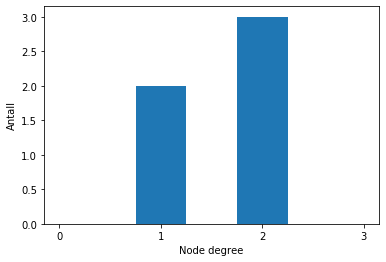

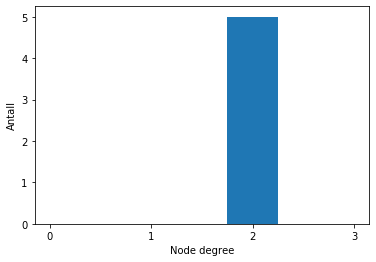

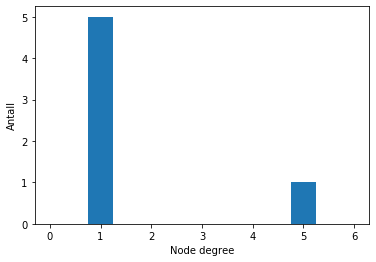

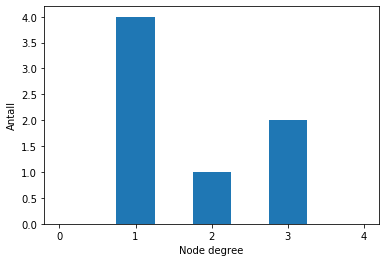

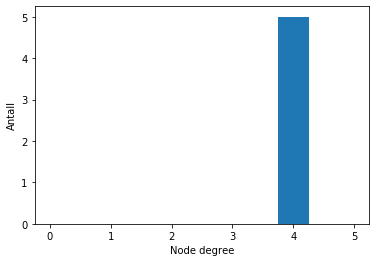

In [19]:
#Lag alle histogrammene under
BussGraph(5).histogram()
RingGraph(5).histogram()
StarGraph(5).histogram()
TreeGraph(2,2).histogram()
MeshGraph(5).histogram();

# Kommenter foreldingen av node degrees som vises i histogrammene her:

Det er logisk å se på et histogram av degree distribution fordi når det blir et stort nettverk, kan det være vannskelig å få oversikten og se på kjennetegnene nettverket har

## BussGraph
Her ser vi at histogrammet viser 2 noder med degree 1 og 3 med degree 2. Siden den ikke er noen noder med degree 0, kan vi trygt si at grafen er *connected* som vil si at alle nodene kan nås fra hvilken som helst node ved hjelp av nabonodene, dette gjelder også for de andre grafene som vises.


## RingGraph
Her ser vi at alle nodene har degree 2, dette vil si at det er en eularian path. og alle grafene kan vises *topologisk* som er ring.


## StarGraph
Her ser vi at det er 5 noder med degree 1 og nøyaktig én node med degree 5. Eneste måten man kan tilfedstille dette på er at alle nodene med 1 degree har kanten sin med den med degree 5. 


## TreeGraph
Her ser vi at det er 4 noder med degree 1, og i en *TreeGraph* betyr det at de nodene er såkalte *"løvnoder"*.

Også ser vi at det er 1 node med degree 2, siden denne tregrafen splitter i 2 hver gang, kan vi si at den har 2 *barn* og ingen *forelder* som vi si at det er *rotnoden*.

Det er også 2 noder med degree 3, som i en tregraf med 2 *barn* vil si at den har 2 *barn* og en *forelder*.



## MeshGraph

Her er det 5 noder av degree 4, som vil si at alle nodene har en kant til alle andre noder minus seg selv





# Del 2: Strukturanalyse
I denne delen skal vi introdusere flere grafstrukturer. Disse grafstrukturene er mer komplekse, men gjenspeiler bedre relle nettverk. <br/> <em>Et tips her er å bruke seed=student_seed for å få samme graf her gang.</em>

## Oppgave 2.1

Lag følgende 4 grafer, alle med 100 noder:

    Graf 1: En Barabasi Albert graf med parameter m=1
    Graf 2: En Barabasi Albert graf med parameter m=2
    Graf 3: En Watts Strogatz graf med parametre k=2 og p=0.1
    Graf 4: En Watts Strogatz graf med parametre k=4 og p=0.1

For hver av grafene, tegn de og lag et histogram over degree distribution.

<em> Her forventer vi at de fire grafene blir konstruert og printet. Vi forventer også å se et histogram for hver graf</em>

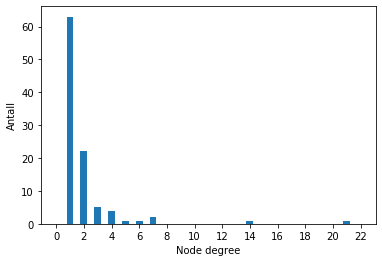

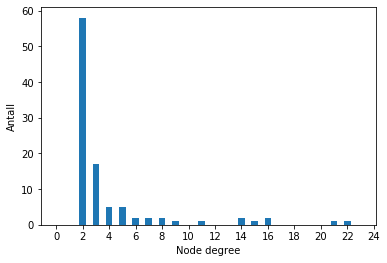

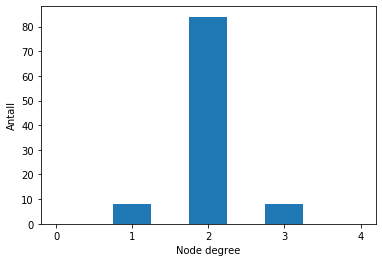

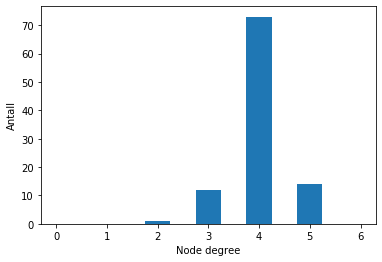

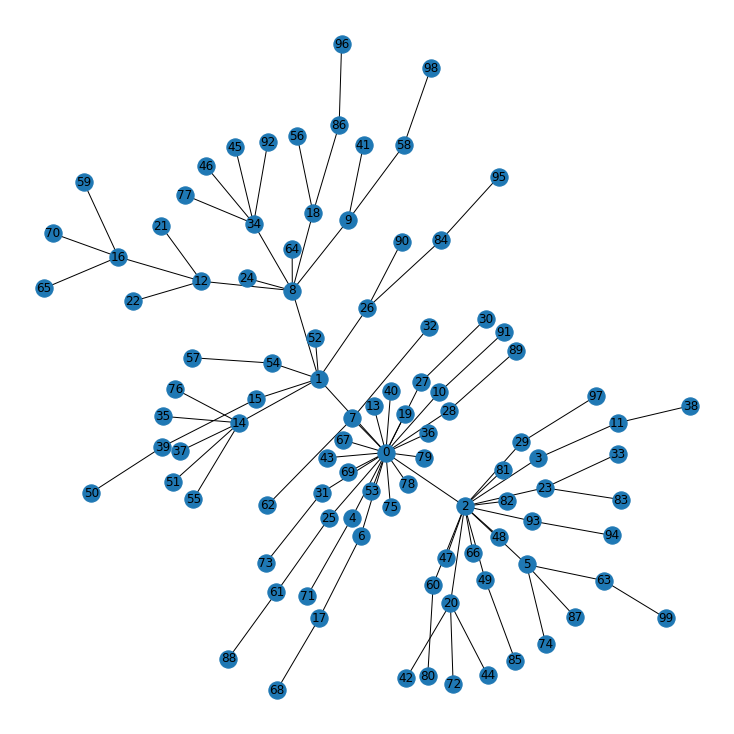

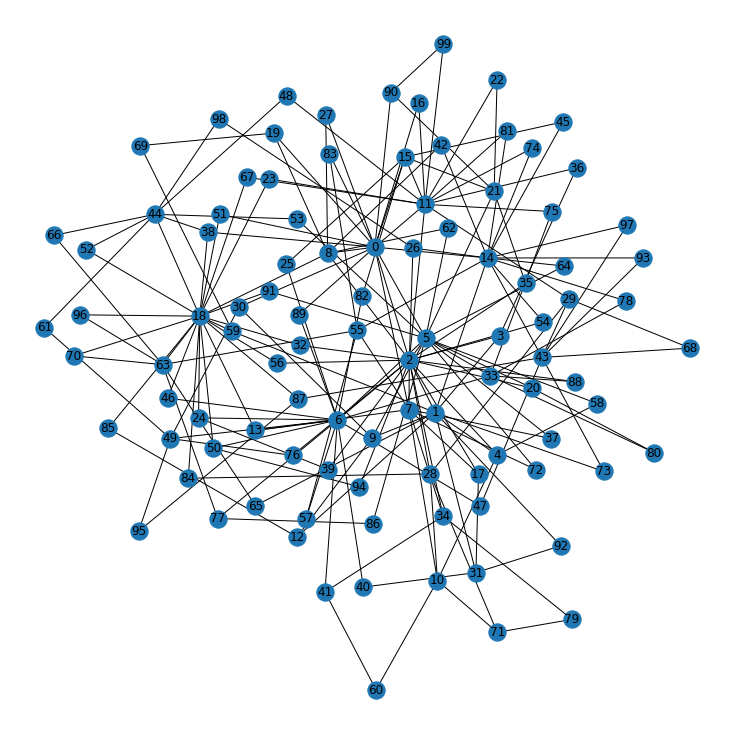

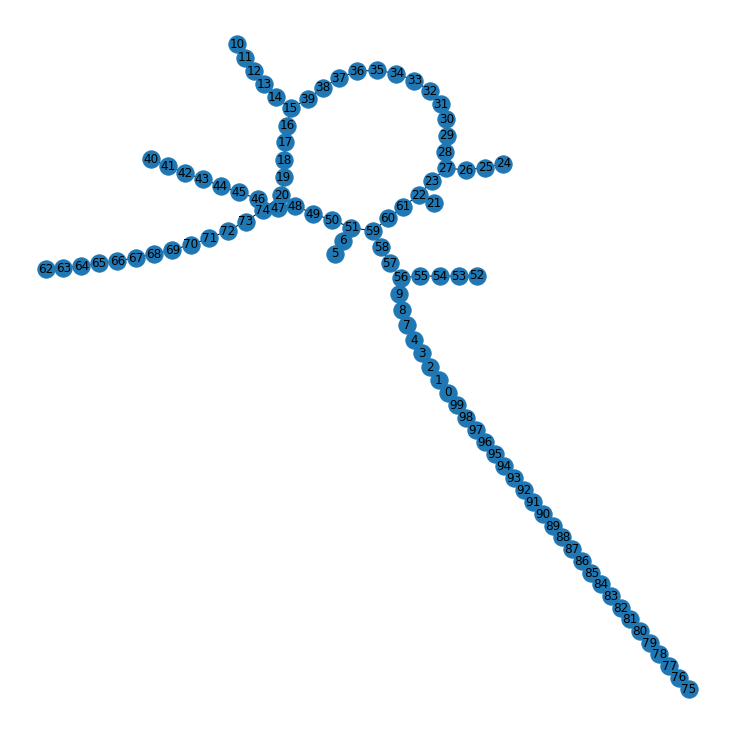

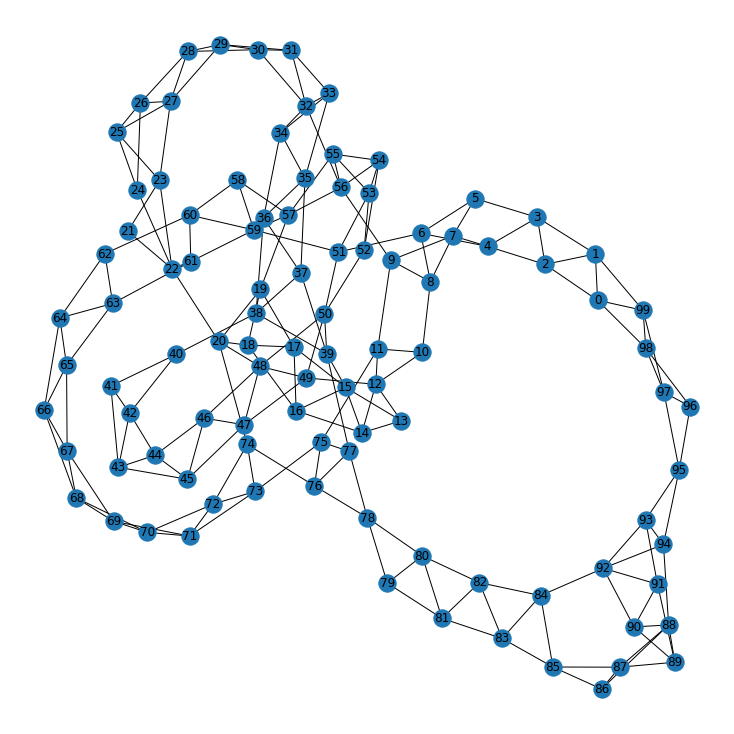

In [159]:
#Kode her
b1 = BarabasiAlbert(n= 100, m=1, seed=student_seed)
b2 = BarabasiAlbert(n= 100, m=2, seed=student_seed)

w1 = WattsStrogatz(n=100, k=2, p=0.1, seed=student_seed)
w2 = WattsStrogatz(n=100, k=4, p=0.1, seed=student_seed)

b1.histogram()
b2.histogram()
w1.histogram()
w2.histogram()

b1.draw()
b2.draw()
w1.draw()
w2.draw()



## Oppgave 2.1.1
Kommenter histogrammene over på hensyn av eventuelle styrker og sårbarheter de forskjellige grafene har

<em> Her forventer vi en sammenhengende tekst der man ser på likheter og forskjeller mellom de forskjellige grafene, med fokus på styrker og sårbarheter </em>

# Forklaring her:

## BarabasiAlbert (m=1):

Her ser vi at at det er klart flest noder med 1 degree,
Også er det noen får noder med svært høy degree

### Svakheter:
Nodene med mange kanter vil ha høy *betweennes centrality*,
fordi den korteste veien fra en node til en annen har høy sannylighet til å være via den.

Dette vil si at den noden vil motta høy trafikk og om den blir fjernet vil mange noder ikke kunne snakke med hverandre

### Styrker:
Siden det er lett å finne disse nodene med høy degree kan man i et nettverk gjøre disse nodene robuste og rakse
slik at det har kapasiteten til å håndtere trafikken mellom nodene

## BarabasiAlbert (m=2):

Her ser vi at det ikke er noen noder med lavere degree enn 2.
Det er fler noder med fler kanter enn på BA (m=1) som vil gjøre at trafikken blir mer fordelt gjennom de nodene.
Det er også mange fler degrees i denne grafen enn i BA(m=1)

### Svakheter:
Det er veldig mange degrees i grafen som gjør at det kan bli kostbart og kontruere og vedlikeholde

### Styrker:
Det vil være større sansylighet for at det er kortere veier fra en node til en annen enn i BA (m=2) som vil redusere trafikk


## WattsStrogatz (k=2, p=0.1):

Her ser vi at alle nodene har degree mellom 1 og 3, som vil si at det er ingen noder som har høy degree

### Svakheter:

Man kan se at grafen er bygd opp en *ringGrafer* og *bussgrafer* som går ut av ringen, 
om man fjerner den en node i ronggrafen som er koblet opp til en buss, vi hele bussen miste *kontakten* med resten av grafen
### Styrker:
Det er veldig få kanter, fordi ingen har høy kantverdi dette vil si at det ikke er så kostbart å konstruere og  vedlikeholde


## WattsStrogatz (k=4, p=0.1):

Her ser vi at det er ingen noder med degree 1 og veldig få med degreee 2,

Det er også ingen noder med høyere grad enn 5, med liket til WS (k=2) som kun har 4
### Svakheter:
Utrolig mange kanter, dette kan gjøre det veldig kostbart å kostruere og vedlikeholde
### Styrker:
Ingen noder med høyere enn 5 kanter, dette gjør det vannskelig for hackere å målrette seg mot én spesiell kant


## Oppgave 2.1.2
Konstruer et nettverk bestående av mellom 9 og 15 noder, med en node som har høyest betweenness centrality, og en av de laveste degree centrality

<em> Her forventer vi at studenten holder seg innenfor grensen på 9-15 noder, samt har konstruert en graf der en node har høyest betweenness centrality, men også en av de laveste degree centralitiene</em>

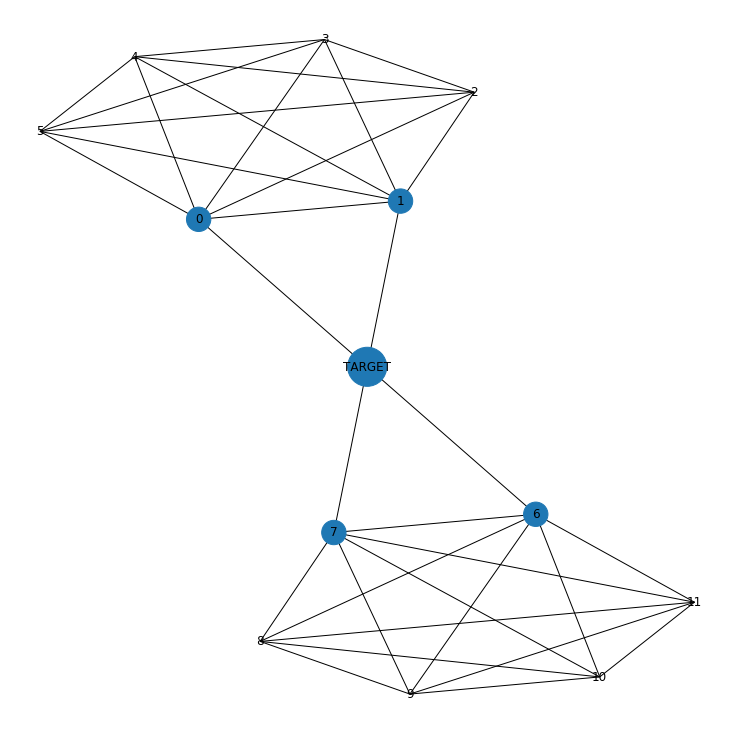

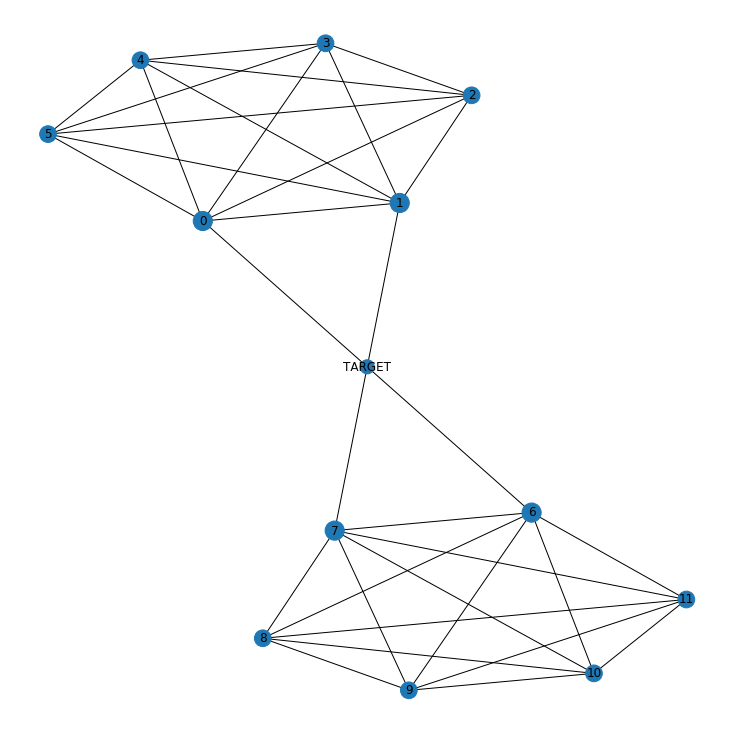

In [11]:
#Kode her

graph = Graph()
graph.add_node("TARGET")

for i in range(2):
    mesh = MeshGraph(range(i*6, (i+1)*6))
    graph.add_nodes_from(mesh.nodes())
    graph.add_edges_from(mesh.edges())
    graph.add_edges_from([("TARGET",i*6),("TARGET", i*6 + 1)])

graph.draw_betweenness_centrality()
graph.draw_degree_centrality()

## Oppgave 2.2

In [14]:
networkURL = get_network(student_seed)
# Du kan bruke variabelen networkURL som parameter i RealNetworkGraph
# Ved å bruke student_seed vil metoden hente samme nettverk hver gang


You will analyze the Garr201110 network.
Your network graph file is http://www.topology-zoo.org/files/Garr201110.graphml



I denne oppgaven skal vi analysere et ekte nettverk. Klassen <code>RealNetworkGraph()</code> tar inn en url av en fil med filtypen .graphml. Lag et objekt for nettverket du får i koden over og tegn det. Filene som kan analyseres finnes på nettsiden www.topology-zoo.org/dataset.html. Funksjonen over henter ut en ".graphml" fil du kan bruke, du kan eventuelt hente den ut selv og se på andre ved å se på nettsiden.

<em> Her forventer vi å se at studenten klarer å hente ut grafen som er blitt tildelt, konstruerer den og viser den frem i cellen nedenfor. </em>

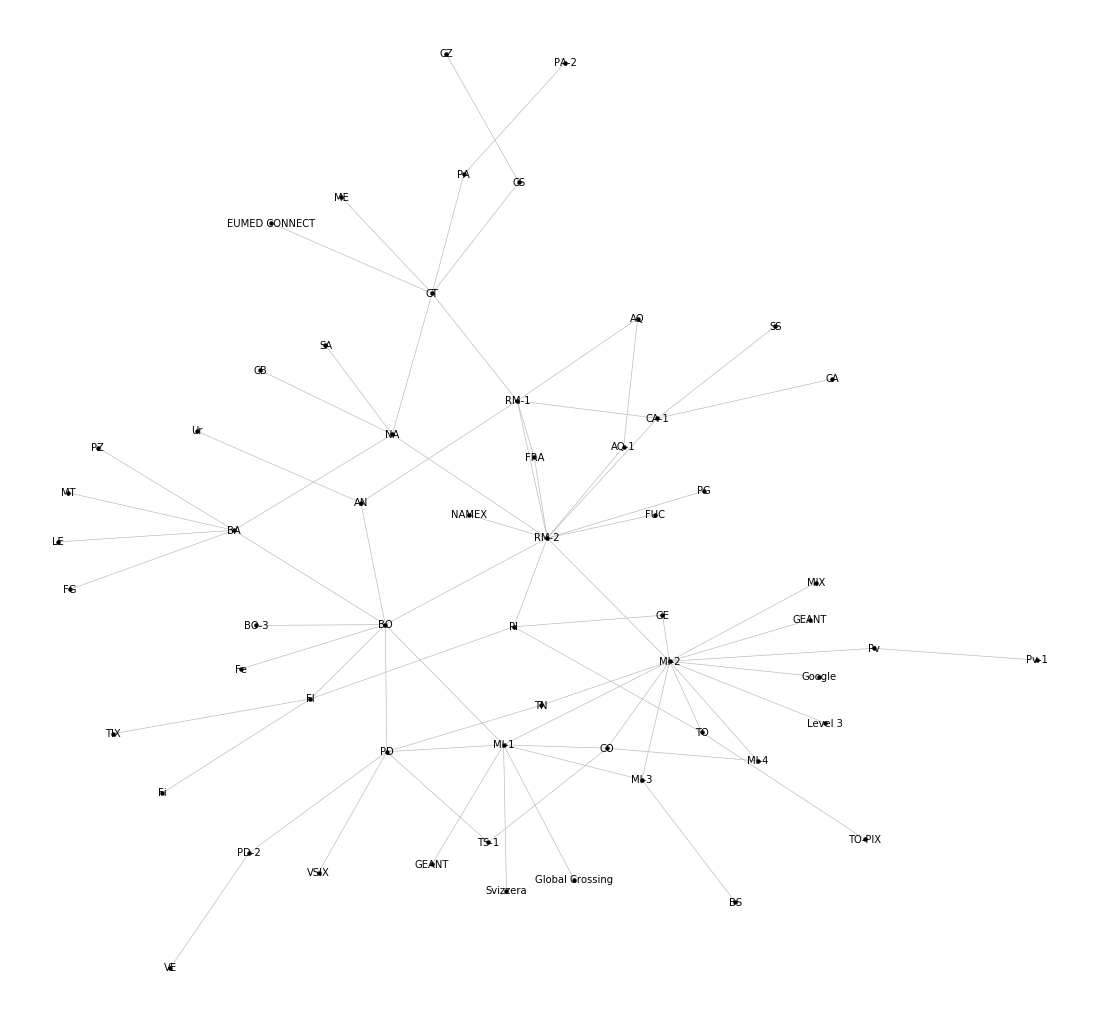

In [15]:
# Konstruer og tegn nettverket her
rng = RealNetworkGraph(networkURL)
rng.draw()

## Oppgave 2.2.1
Plott et histogram over degree distribution for nettverket over. Hva forteller histogrammet deg?

<em> Her forventer vi å se et histogram og en tekst om hva histogrammet forteller. Her kan det være lurt å blande inn histogrammer fra tidligere oppgaver, og bruke disse til å drøfte det reelle nettverket. </em>

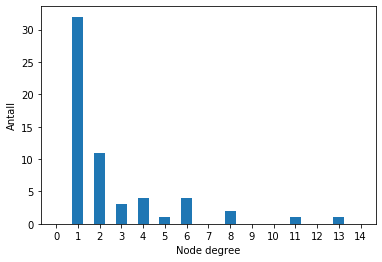

In [17]:
#Kode
rng.histogram();

## Forklaring
Dette histogrammet likner på en Barabasi Albert graf med m=2 (se oppg 2.1), fordi den har noen noder med mange node degrees.
Disse nodene er sentrale for at nettverket skal kjøre. 

Vi ser også at det er de fleste endeSystemene, kun er koblet opp til en sentral node.
 Dette vil si at hvis den sentrale noden feiler, så vil ikke disse endesystemene kunne kommunistere med nettverket



## Oppgave 2.2.2
Under er det oppgitt en funksjon for å gi ut hvilke noder som er viktigst med de tre funksjonalitetene. Bruk funksjonen på grafen.
Er noen noder viktig i flere av sentralitetene? Hvorfor?

<em> Her forventer vi at studenten klarer å bruke metoden som er gitt, til å finne de viktigste nodene i hver kategori. Deretter forventer vi at studenten klarer å finne noder som er viktige i flere kategorier, og drøfter kort rundt dette.</em>

In [12]:
def get_centrality_table(graph):
    deg= graph.degree_centrality()
    cls = graph.closeness_centrality()
    betw = graph.betweenness_centrality()
    lst = [deg,cls,betw]
    for i,obj in enumerate(lst):
        values = [(graph.nodes[k]["label"],v) for k, v in sorted(obj.items(), key=lambda item: item[1])]
        values.reverse()
        lst[i] = values
    print("\nCentrality Indexer,\n-sortert i synkende rekkefølge\n")
    print("\033[1m" + "Degree".ljust(20) + "Closeness".ljust(20) + "Betweenes".ljust(20) + '\033[0m')
    for deg,cls,betw in zip(*lst):
        print(deg[0].ljust(20) + cls[0].ljust(20) + betw[0].ljust(20))


In [18]:
#Kode her
get_centrality_table(rng)


Centrality Indexer,
-sortert i synkende rekkefølge

Degree              Closeness           Betweenes           
MI-2                RM-2                RM-2                
RM-2                BO                  MI-2                
MI-1                MI-2                BO                  
BO                  MI-1                CT                  
BA                  NA                  NA                  
PD                  RM-1                MI-1                
CT                  BA                  BA                  
RM-1                PD                  RM-1                
NA                  CA-1                PD                  
PI                  AN                  FI                  
CO                  PI                  CA-1                
FI                  FRA                 PI                  
CA-1                CO                  AN                  
AN                  MI-3                TO                  
TO                  TN          

## Forklaring
**MI-2** noden scorer høyest på degree centrality, fordi den har 13 noder, som er flest noden i grafen


**RM-2** node har høyest closeness- og betweennes-verdi og den har nest høyest degree-verdi

**RM-2**:
    
    Den har høyest betweenness-verdi fordi kantene til noden strekker over til kanter er "langt" unna hverandre,
    sett bort ifra den selv. Dette vil si at de andre kantene som skal over til en som egentlig er "langt" unna, kan
    bruke RM-2 noden for få kortest mulig sti.

    Den har høyest closeness-verdi også av samme grunn som betweenness som gjør at den korteste veien til alle noder
    blir kort fordi den slipper å ta den vanlige veien.

    Den har nest høyest degree, som kommer av at den har 11 kanter som er nest mest i denne grafen. dette gjør noden sentral.


## Oppgave 2.3
<code>ConstructedGraph()</code> simulerer et reelt nettverk, bestående av et kjernenett med grid-struktur, et regionalnett og et tettbebygd aksessnett. Bruk klassen og tegn grafen.

For hver av de tre centralitiene, finn de mest sentrale nodene og tegn de. Hvor ligger de viktigste nodene, og hvordan ville du beskrevet robustheten til regionalnettet?

<em> Her forventer vi at studenten klarer å bruke ConstructedGraph() til å printe ut et reelt nettverk, og at studenten skjønner hvilke deler dette nettverket er bygget opp av. Deretter forventer vi at studenten viser de mest sentrale nodene innenfor hver kategori, forteller hvor i grafen de ligger, og drøfter robustheten til regionalnettet.  </em>

Mest sentrale node for Degree centrality er: ['d0', 'aa0', 'ab0', 'ac0', 'ad0', 'ba0', 'bb0', 'bc0', 'bd0']
Mest sentrale node for Betweenness centrality er: ['d0']
Mest sentrale node for Closeness centrality er: ['core4']


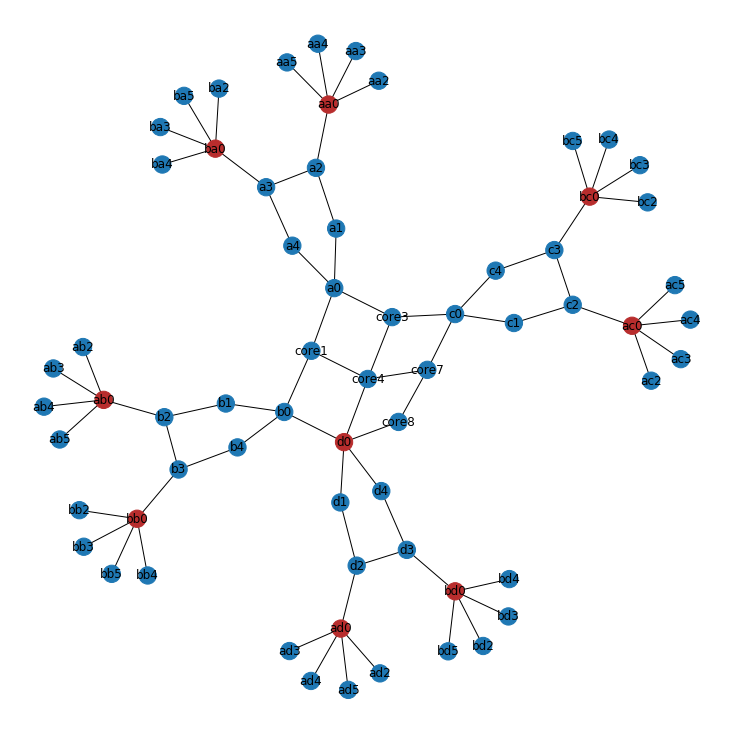

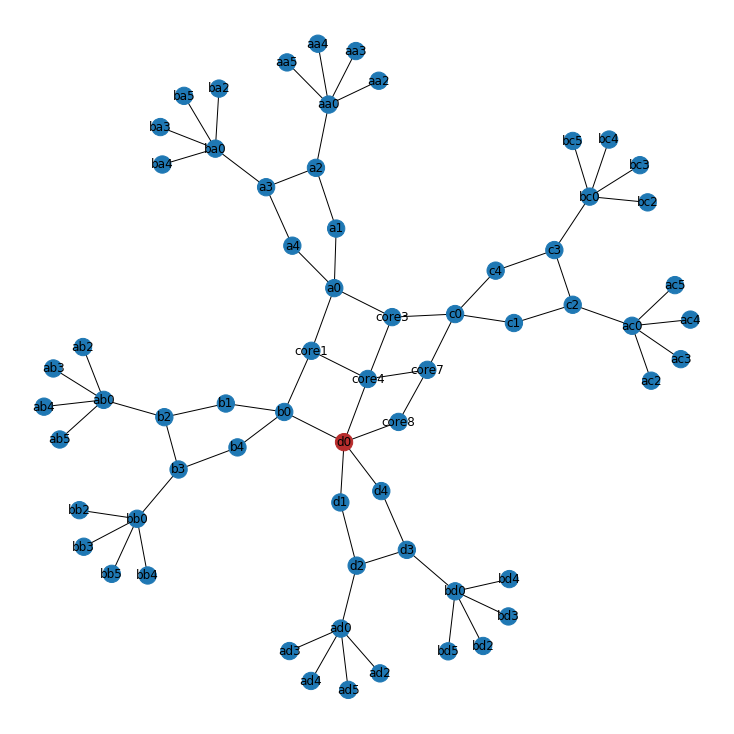

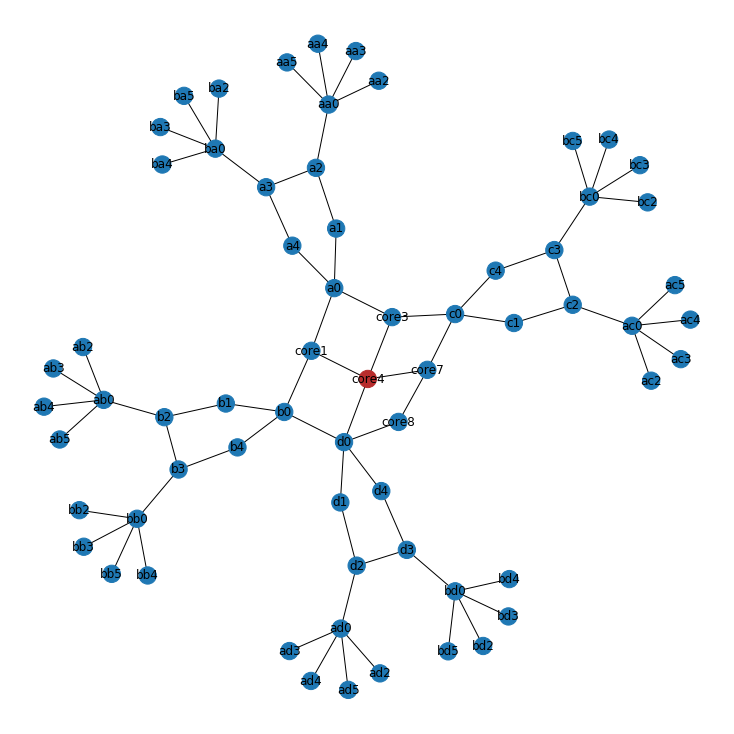

In [10]:
#Kode her
cg = ConstructedGraph()

deg= cg.degree_centrality()
betw = cg.betweenness_centrality()
cls = cg.closeness_centrality()


# get the node(s) with the max value, there might be more nodes with the same max value
mx_deg = max(deg.values())
max_deg = [k for k, v in deg.items() if v == mx_deg]
cg.mark_nodes(max_deg)

mx_betw = max(betw.values())
max_betw = [k for k, v in betw.items() if v == mx_betw]
cg.mark_nodes(max_betw)

mx_cls = max(cls.values())
max_cls = [k for k, v in cls.items() if v == mx_cls]
cg.mark_nodes(max_cls)

maxes = {}
maxes["Degree centrality"] = max_deg
maxes["Betweenness centrality"] = max_betw
maxes["Closeness centrality"] = max_cls
for name, maks in maxes.items():
    print("Mest sentrale node for", name, "er:", maks)

## Forklaring
I første grafen over kan en se at en har røttene i de tettbebygde aksessnettene som har høyest "Degree centrality". Dette er fordi de kommuniserer med ende-systemene som det ofte er flest av. Deres robusthet er ikke særlig sterk da det ikke er noen særlig fail-safe om de skulle feile, noe som kan kutte endesystemer fra nettet.

I andre grafen ser en den mest sentrale noden basert på Betweenness. At det er nettop d0 er nok fordi den har en ekstra kant til core8 og får derfor ekstra veier gjennom seg. Ellers kunne det vært en gitt rotnode for regional-nettene ut ifra kjernen. For det er nettop disse alle trafiikken må gjennom for å nå noder i regionalnettene. At disse nodene står alene for al trafiiken ut til reional-nettene kan gjøre nettet svært sårbart, og bør kanskje forsterkes.

I siste grafen er den mest sentrale noden basert på "Closeness". Her er det svært robust at en har en kjerne-node som den noden med kortest vei til alle. Dermed kan distribuere informasjon på en mest mulig effektiv måte.

# Del 3: Angrep og robusthet
Her skal vi analysere og diskutere det simulerte nettverket fra oppgave 2.3 i dybden. I denne oppgaven vil vi bruke en utvidet versjon av nettverket.<br/>
Kjør cellen for å generere nettverket

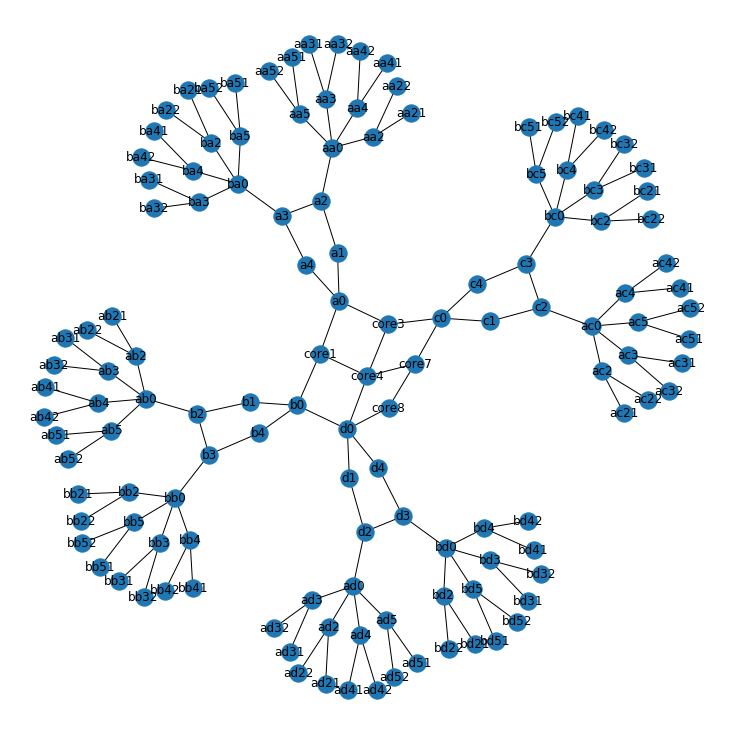

In [35]:
cg = ConstructedGraph(expanded=True, seed=student_seed)
cg.draw()

## Oppgave 3.1
Bruk de numeriske verdiene for de forskjellige centrality-målene for å finne hvilke noder i nettverket som er viktigst. Er det noen av nodene som overrasker deg?

<em> Her forventer vi å se at studenten bruker metoder som tidligere har blitt introdusert, til å finne de viktigste nodene i grafen. Deretter forventer vi å se en kort drøftende tekst på hvilke noder dette gjelder.</em>

#### Forklaring
Som en ser i grafen under er det tydelig at alle kjerne-nodene er sentrale for driften av nettverket, 
uansett hvilken centrality en ser på. De er de mest tilgjengelige siden grafen har like egenskaper som en 
tree-graph. Kjernen er også robust da de har høy Degree centrality mellom seg, som gjør det lett å kunne
videreformidle informasjon om det skjer en feil en kjerne-node.

Det som overasker er hvor mye nettverket er avhengige av robuste noder rett utenfor kjernen, 
altså noder som a0 og c0. Om disse feiler vil en kutte av en gitt fjerdel av nettverket siden
betweenessen avhenger av de alene for hele regional-nettverket. Det samme gjelder også for nodene som ba0 og bc0 
for å kunne nå endesystemene.

1. Degree Centrality


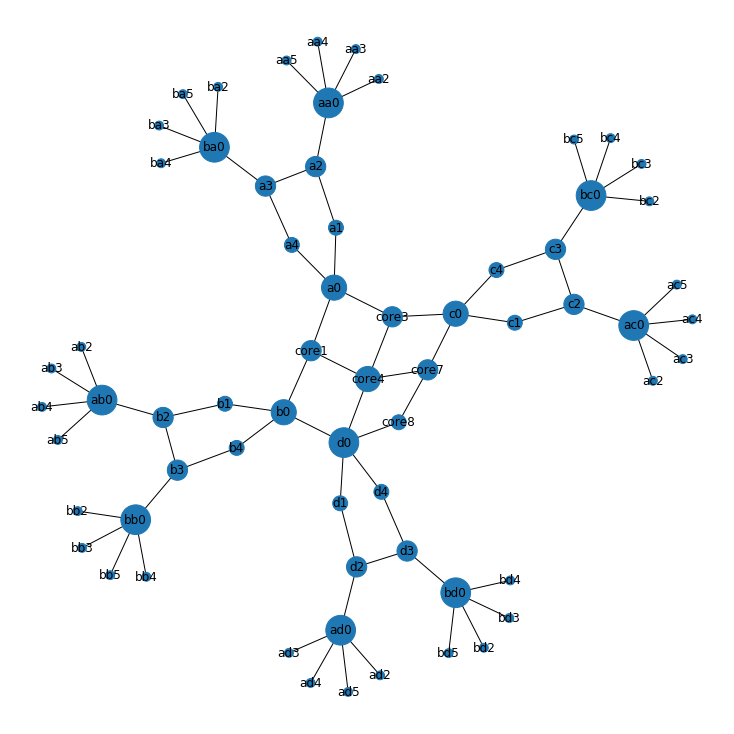

In [161]:
#Kode og forkaring her
print("1. Degree Centrality")
cg.draw_degree_centrality()

2. Closeness Centrality


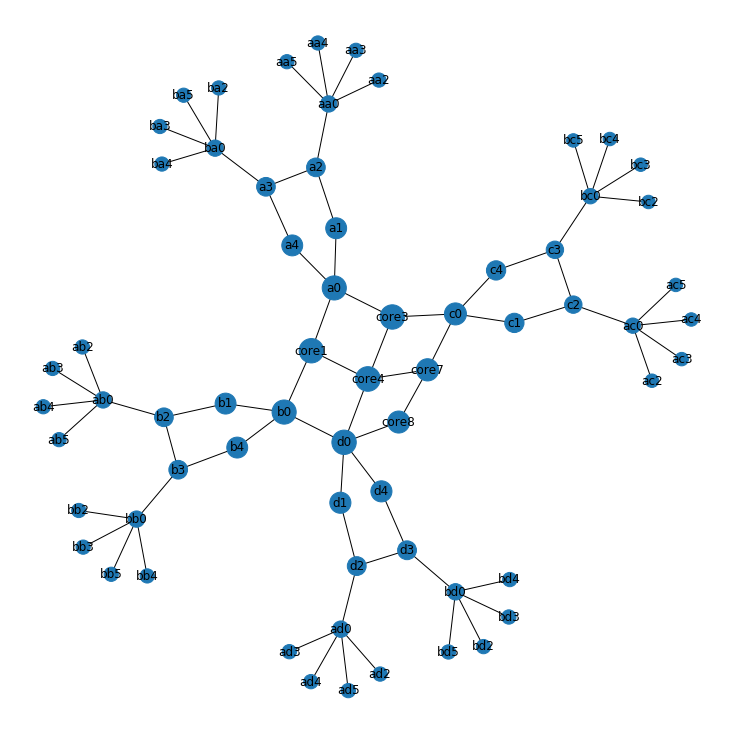

In [162]:
print("2. Closeness Centrality")
cg.draw_closeness_centrality()

3. Betweenness Centrality


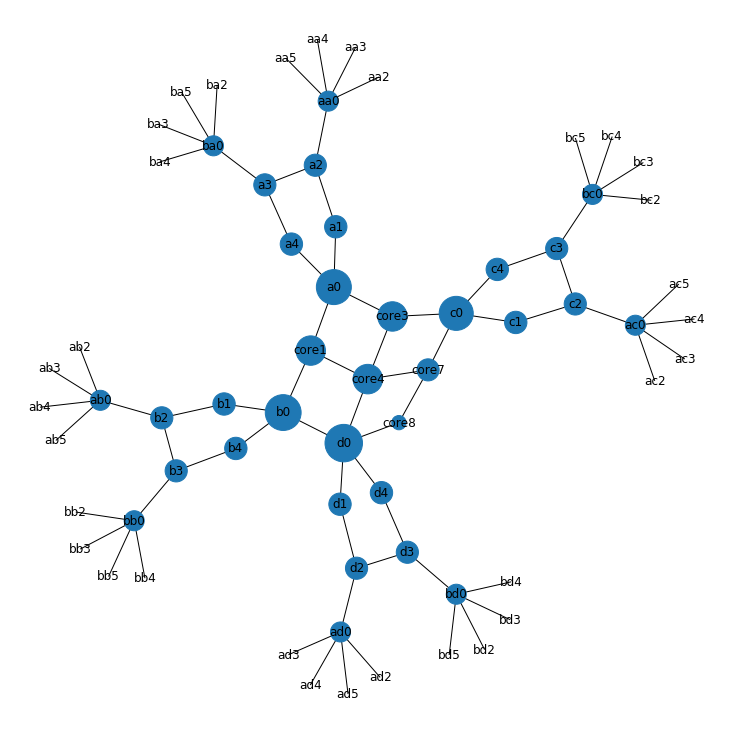

In [163]:
print("3. Betweenness Centrality")
cg.draw_betweenness_centrality()

## Oppgave 3.2
Bruk metoden <code>delete_random_nodes</code> for å simulere tilfeldige feil som kan skje i nettverket.
* Fjern en node. Tegn så grafen
* Fjern tre noder. Tegn så grafen

Kommenter skaden av nettverket

<em> Her forventer vi å se at studenten klarer å printe ut to forskjellige grafer, en der en node er fjernet og en der tre noder er fjernet. Disse nodene skal være fjernet ved å bruke delete_random_nodes. Forventer også et kort analyse over nettverket, og drøftning av skaden disse feilene påførte nettverket. Her kan man dra inn metoder tidligere brukt</em>

Removed node bc0 using random_fault
Removed node bc0 using random_fault
Removed node ba31 using random_fault
Removed node ba51 using random_fault


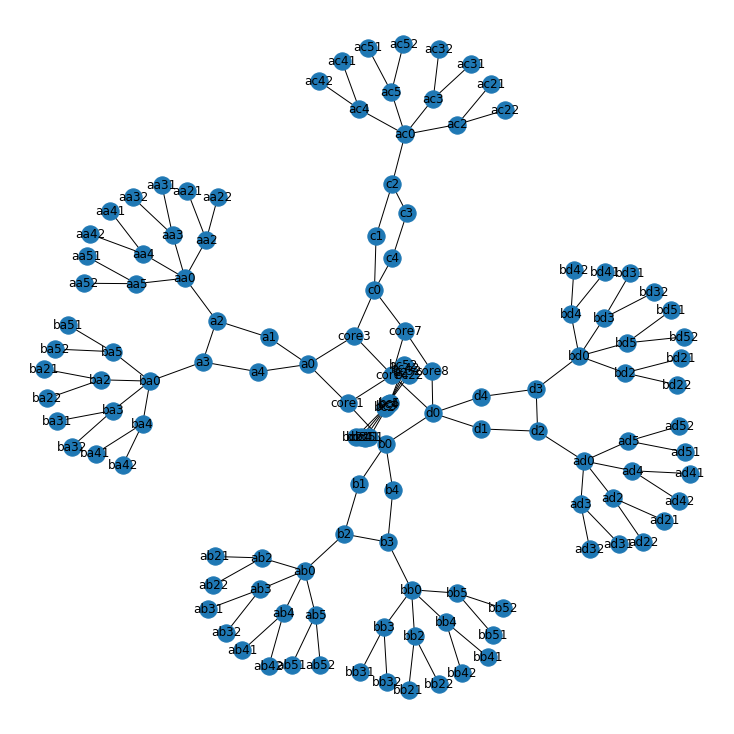

In [164]:
#Skriv koden her
c = ConstructedGraph(expanded=True, seed=10027)
graf, graf1, graf2 = c, c, c,
graf1 = graf1.delete_random_nodes();
graf2 = graf2.delete_random_nodes(3);

graf1.draw()

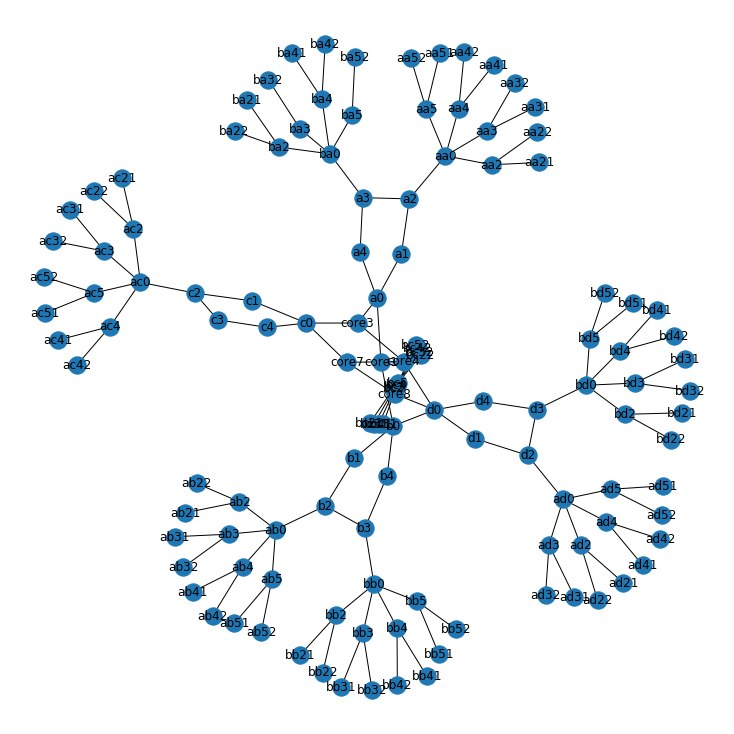

In [165]:
graf2.draw()

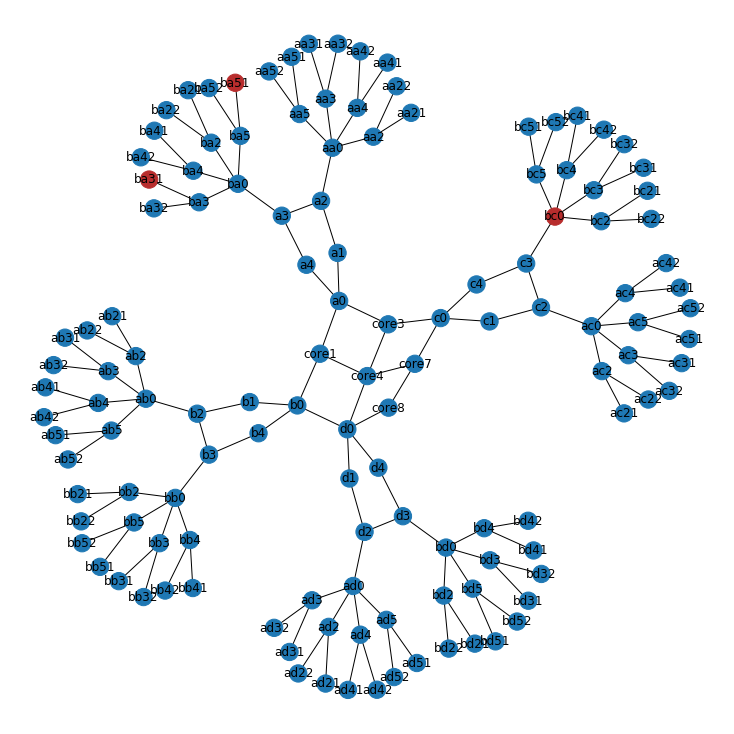

In [166]:
graf.mark_nodes(["bc0","ba31","ba51"])

### 1 Node-feil
Når en node feiler er det bc0 som går bort. Dette er svært alvorlig for dette nettverket, da et helt regional-nett er avhengig av betweennessen gjennom denne. Som vist i tredje grafen fører feilen av bc0 til at cirka en fjerdel av nettet faller bort.

### 3 Node -feil
I det andre tilfellet der 3 noder feiler mister vi den samme som før, samt to ende-noder: ba31 og ba51. At disse to faller bort er ikke særlig alvorlig for selve nettverket, da ikke mye avhenger av deres tilkobling. Men at bc0 faller bort er katastrofalt. 

**nb**: i de to første grafene blir de avkuttede nodene kastet i midten, fant ingen fiks på det

## Oppgave 3.3
Prøv å angripe nettverket ved å bruke en kombinasjon av logisk tenkning og verdiene fra oppgave 3.1. Oppgaven her er å gjøre så mye skade som mulig ved å fjerne tre noder.

For hver node du velger å fjerne, begrunn hvorfor.

<em> Her forventer vi at studenten har forstått oppgaven og velger å fjerne tre noder som er svært sentrale. Forventer å se begrunnelse/tankegang for hver node som fjernes. </em>

#### Angrep
Planen for å gjøre mest skade blir å prøve å separere så mange subnett fra kjernen som mulig, dette kan gjøres
ved å gjenkjenne de nodene med høy betweenness. Disse er ofte knyttepunkter, dermed kan en bruke disse
til å prøve å isolere subnett

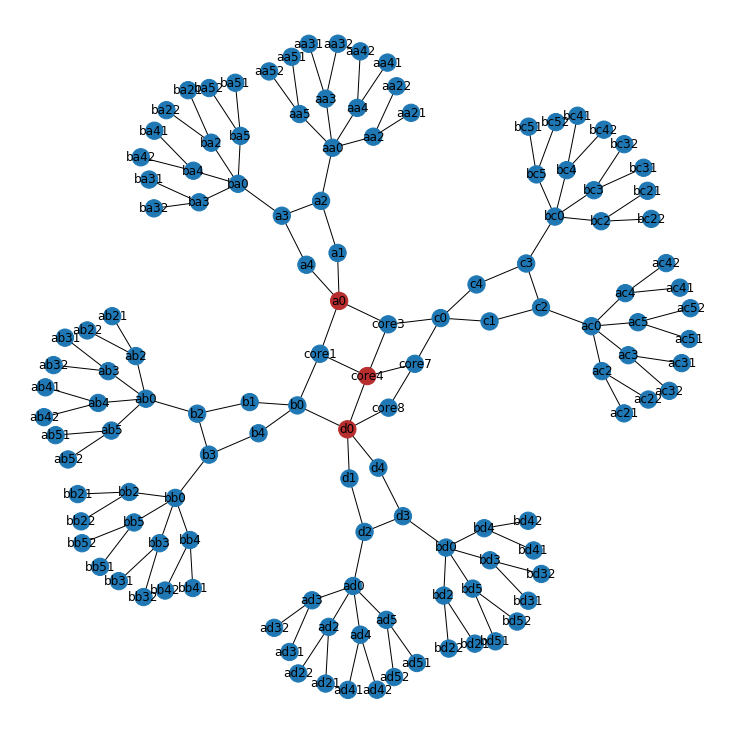

In [170]:
attackGraph = ConstructedGraph(expanded=True, seed=10027);

attackGraph.mark_nodes(["a0","d0", "core4"])

Det første vi gjør er å angripe nodene a0 og d0. Disse er to rotnoder for nettverk utifra kjernen,
og de er på hver sin side av nettverket, som isolerer etterfølgerne deres, samt gjør det mulig for å videre 
isolere subnett.

Deretter angriper vi core4, som dermed kutter ut core1 og rotnoden b0, som kutter hele sitt tre ut av nettverket
Dermed står en kun igjen med fire separate subnett der kun to av de har kjerne-noder i seg, noe som vil være
katastrofalt

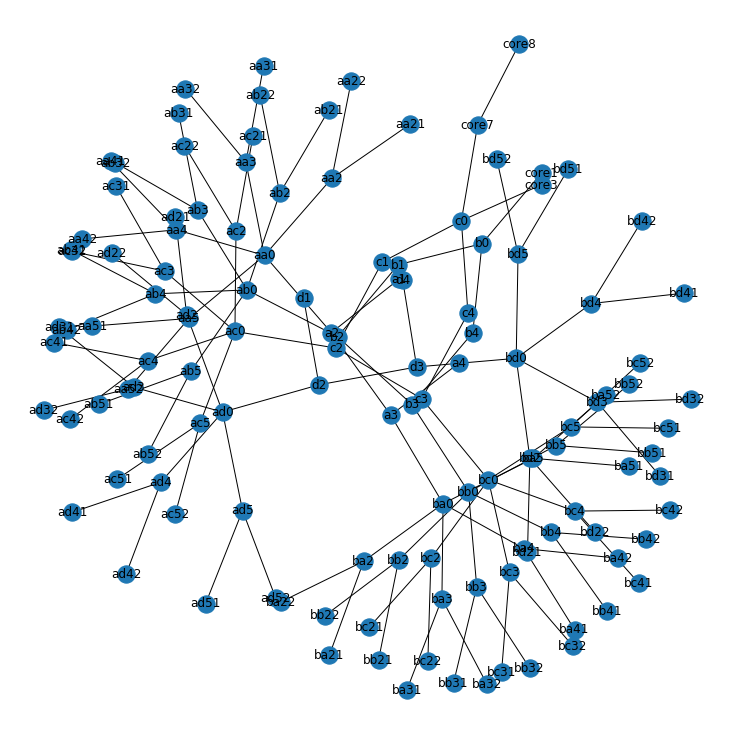

In [171]:
attackGraph.remove_node("a0")
attackGraph.remove_node("d0")
attackGraph.remove_node("core4")

attackGraph.draw()

## Oppgave 3.4
En måte å se hvor mye skade som har blitt gjort på et nettverk er å bruke noder i største partisjon, eller se på node degree ved hjelp av et histogram.

Bruk disse metodene på oppgave 3.2 og 3.3, og diskuter skadene ut ifra resultatene du nå har fått.

<em> Her forventer vi å se at studenten klarer å vise et histogram og klarer å bruke metoden for å finne noder i største partisjon. Vi forventer også å se en drøftning av konsekvensene i de to foregående oppgavene, og at studenten skjønner alvorligheten i målrettede angrep.</em>

Utgangspunktet


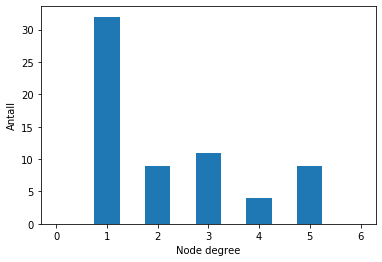

Største partisjon: 129
Oppgave 3.2


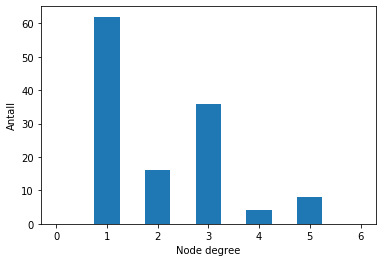

Største partisjon: 114
Oppgave 3.3


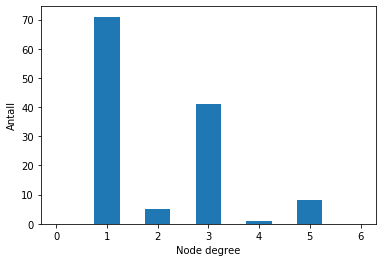

Største partisjon: 34


In [172]:
#Kode her
main = ConstructedGraph(expanded=True, seed=10027);
print("Utgangspunktet")
cg.histogram()
print("Største partisjon:", main.get_largest_components_size())

print("Oppgave 3.2")
graf2.histogram();
print("Største partisjon:", graf2.get_largest_components_size())

print("Oppgave 3.3")
attackGraph.histogram();
print("Største partisjon:", attackGraph.get_largest_components_size())

# Forklaring
## 3.2
Her kan en se at feilene ikke hadde betydelig utslag på histografen.  Den største partisjonen gikk også fra 129 til 114, noe som ikke nødendgivs er katastrofalt for nettvkerket, men samtidig svært alvorlig. 

## 3.3
Utslaget ved dette angrepet vises best i at noder som tidligere haddde 2 eller 4 kanter, nå har 1 eller 3. Dette reflekterer vårt mål om å dele nettverket inn i subnett. Største partisjonen ble også redusert til 34! Noe som er katastrofalt for funksjonaliteten til nettverket. Dette viser at planlagt angrep av ondsinnde aktører vil kunne føre til ekstreme konsekvenser.

## Oppgave 3.5
Forklar hva som menes med begrepet noder i største partisjon. Hva kan være fordeler og ulemper ved å kun bruke noder i største partisjon og histogram som pålitelighetsmål? Er dette fornuftig i vårt tilfelle?

<em> Her forventer vi å se at studenten har forstått begrepet noder i største partisjon, og hvorfor dette kan brukes til å vise sårbarhet. Vi forventer også en drøftning av hvorfor/hvorfor ikke, det kan være lurt å bruke noder i største partisjon og histogram som de eneste pålitelighetsmålene.</em>

# Forklaring
### Noder i størst partisjon
Begrepet betyr at en ser på hvor mange noder den største partisjonen i grafen inneholder før og etter en endring. I vårt tilfelle så vi først på det totale antall noder som er sammnenhengende i grafen, og så etter et angrep telte vi hvor mange noder vi hadde "mistet".
Å bruke dette som en målestokk avhenger av hva slags nettverk en bruker. I et Peer-To-Peer nettverk vil det være et ekstremt nyttig verktøy da en ser på nodene som "likeverdige". Men i andre sammenhnger da en har noder som er dedikerte til funksjonalitet som leverandører av en tjeneste(som for eksmpel servere), og noen som kun er forbrukere, vil en først og fremst fokusere på de få serverene og ikke nødvendigvis de mange forbrukerne. Dermed vil ikke hvor mange noder man mistet være fokuset, men hvilke spesielle noder man mistet.

### Histogram
I nettverk med mange Stjerne-liknende grafer i seg kan histogram ganske effektivt sjekke for om man har mistet spesielle typer noder, for eksempel har serevere ett til mange relasjoner med noder i nettverket, da kan man sjekke for om man har mistet noder med nettop mange kanter i seg. Hvis man da krysjekker med metoden over vil man kunne finne mye informasjon om hvilke, og hvilke typer noder man har mistet. 

Disse to metodene kan flettes godt med hverandre for å drøfte sårbarheter i nettverk, det er selvsagt ikke lurt å kun bruke disse sammen, og ihvertfall ikke hver for seg. Men de er fine for å få et ovrblikk.

## Oppgave 3.6
Under ser du metoden for å lage en graf som sammenligner angrep med forskjellige metoder. Bruk metoden på det originale nettverket og sammenlign med det samme nettverket der du har lagt inn tre ekstra kanter som redundans. Diskuter kort effekten av ekstra redundans.

<em> Her forventer vi å se at studenten har klart å bruke metoden som er gitt til å vise skaden på det originale nettverket. Deretter forventer vi å se at studenten klarer å legge inn tre ekstra kanter, og begrunne hvorfor disse tre kantene er valgt. Til slutt vil vi se en kort diskusjon av effekten vi får av å legge til ekstra kanter i et nettverk.</em>

In [173]:
def get_attack_graph(G):
    count = G.number_of_nodes()
    outputs = [[0 for _ in range(count)] for _ in range(4)]
    graphs = [G for _ in range(4)]
    x = range(0,count)

    for i in x:
        for j, graph in enumerate(graphs):
            outputs[j][i] = graphs[j].get_largest_components_size()
        graphs[0] = graphs[0].delete_random_nodes(print_result=False)
        graphs[1] = graphs[1].delete_nodes_attack(centrality_index="degree",print_result=False)
        graphs[2] = graphs[2].delete_nodes_attack(centrality_index="closeness",print_result=False)
        graphs[3] = graphs[3].delete_nodes_attack(centrality_index="betweenness",print_result=False)

    bc1,bc2,bc3,bc4 = outputs
    plt.plot(x,bc1,color="red",label="Random faults")
    plt.plot(x,bc2,color="green",label="Degree centrality")
    plt.plot(x,bc3,color="blue",label="Closeness Centrality")
    plt.plot(x,bc4,color="orange", label="Betweenness Centrality")
    plt.ylabel("Amount of nodes in largest partition")
    plt.xlabel("Amount of nodes in removed")
    plt.legend(loc="upper right")
    plt.show()


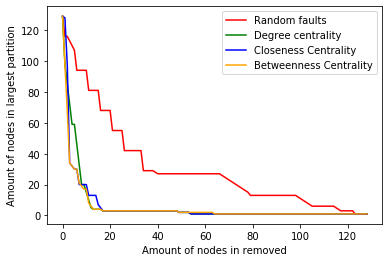

In [174]:
org = ConstructedGraph(expanded=True, seed=10027)

get_attack_graph(org)


org.add_node("r0")
org.add_node("r1")
org.add_node("r2")

org.add_edges_from([
    ("r0","a4"),
    ("r0","core1"),
    ("r0","b1"),
    ("r1","b4"),
    ("r1","d1"),
    ("r2","c1"),
    ("r2","d4"),
    ("r2","core7")
])

### Strategi
Etter angrepet er det tydelig at nodene rett utenfor kjernen er det mest utsatte, dermed virker det naturlig å
fortsterke deres koblinger til resten av nettverket. Å utvide kjernen sine koblinger mellom grenene, og dermed
øke antall stier til hver ende-node er beste måten å styrke grafen.

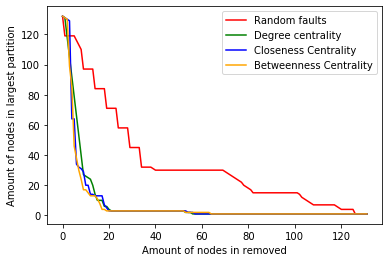

In [175]:
get_attack_graph(org)

### Resultat
Etter de tre forsterkende nodene er betydelig bedre. Man en kan se at grafen ikke er like bratt. Naturligvis vil det å fjerne flere enn 15 noder gjøre stor skade, uansett hvor mange kanter man legger til som redundans. Effekten av å legge til kanter vil som regel gjøre nettverket mer robust, i form av at det tåler mer trafikk og håndterer at noder feiler bedre. Det vil også gjøre det mer effektivt ved at man får flere stier. Det som er ulempen er at det blir mer kostbart å opprettholde og vedlikeholde.

# Del 4: Sikring av VDES

Du er nå ansatt som en sikkerhetsingeniør i VDES; og har som oppgave å sikrenettverket mot angrep, både mot ondsinnede handlinger og tilfeldige feil . Her er det viktig å analysere nettverket, finne low-hanging fruits og legge på ekstra redundans der det trengs, uten at kostnadene skal bli unødvendig høye. Bruk metodene som er lært i øvingen for å analysere og sikre nettverket. Forklar dine valg. Drøft konsekvensene av at ondsinnede aktører får tak i informasjonen rundt nettverket ditt. 

Analysen skal vise en gjennomgående forståelse av grafteori og grafteoretisk strukturell analyse. Bruk av fagbegreper og relevante begreper blir vektlagt. Oppgaven skal være kort og konsis og maks 800 ord. Start oppgaven med et bilde av nettverket og vis til figurer, histogrammer og grafer hvordan du vil sikre nettverket. Utforsk gjerne med å legge til redundans, teste angrep og vurdere tiltakene med histogram over node degree. Inkluder robusthetsgrafen og bruk den for å se på effekten. Bruk koden og resultatene som dokumentasjon for tiltakene og hva din anbefaling blir til VDES selskapet.

Netverket du skal analysere finner du vek å kjøre kodeblokken under:

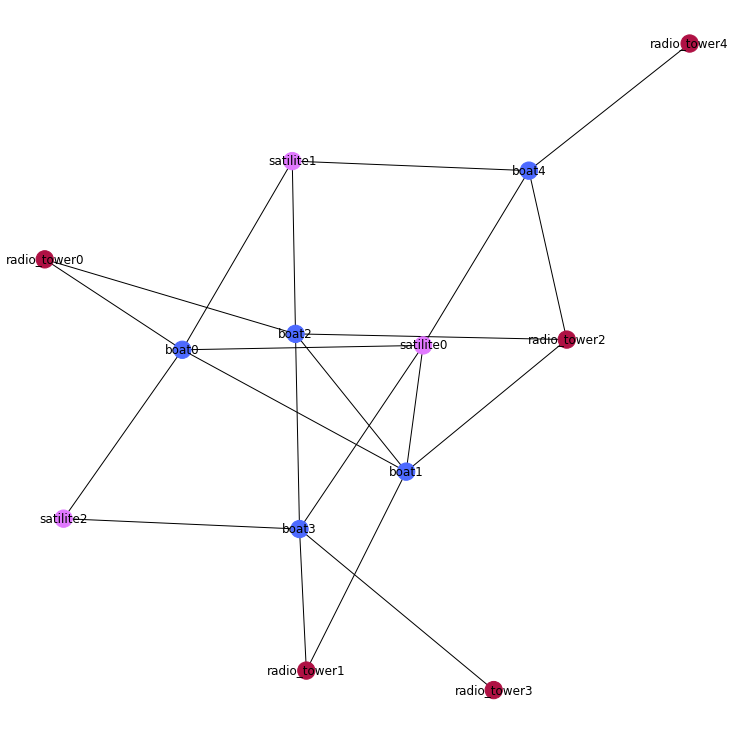

Histogram av grafen


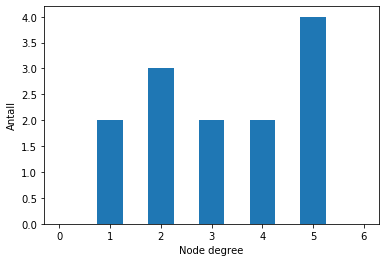

In [177]:
r.seed(student_seed)
boat_count = r.randint(4,9)
satellite_count = r.randint(1,3)
radio_tower_count = r.randint(2,5)

vdesGraph = VDESGraph(boat_count,satellite_count,radio_tower_count)
vdesGraph.draw()
print("Histogram av grafen")
vdesGraph.histogram();

### Styrker
Gjennom histogrammet kan en se at det er kun to noder som har en kant i seg. I grafen ser en også at disse to kun er radiotårn, noe som er ideelt da de er de billigste elementene av nettverket, og at det ikke er risiko for tap av menneskeliv om de går tapt. Det viktigste er nemlig at båtene minst har to noder å kommunisere med, slik at en kan oprettholde kommunkasjon med omverdenen. Siden vårt nettverk har det, er vi sikret en type "fail-safe" ved at enhver båt sannysnligvis alltid har minst en node å kommunisere med. 

### Svakheter
Et såpass bra knyttet nettverk kan også være en svakhet, fordi om en ondsinnet aktør finner en såkalt "zero day vulnerability" og gjennom den, eller noen fysiske svakheter få injisert nettverket med malware, vil alle noder være utsatt for angrepet. Siden det er mange noder med >3 grader vil en dårlig pakke også kunne spre seg fort over nettverket.

### Tiltak
Siden satelitt-dekningen her er såpass god kan en eliminere risikoen ved å ha utsatte radiotårn på bakken. Ved metoden reduce kan en redusere kommunikasjonen med tårnene og heller bruke de som en failsafe om satelittene skulle feile. Eller så kan en lage en type rettet graf den en kun tillater enveis kommunkasjon mot land, om en er i nød eller liknende, og heller tillate toveis-kommunikasjon som en failsafe.

Nettverk uten radiotårn


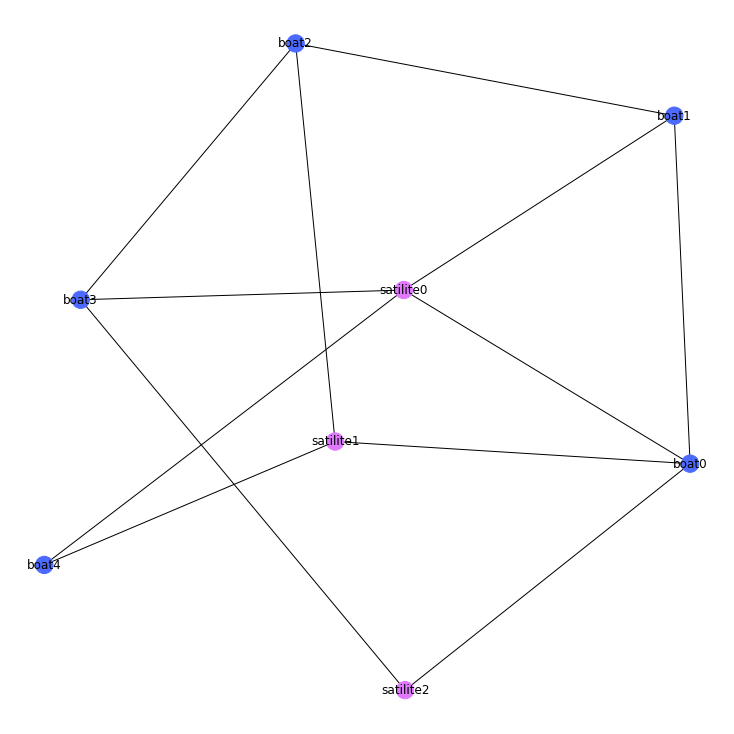

Histogram uten radiotårn


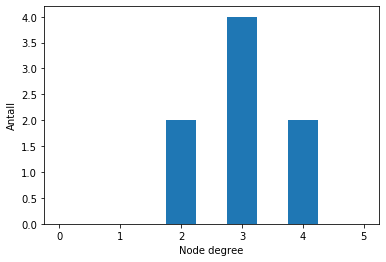

In [178]:
vdes = VDESGraph(boat_count,satellite_count,radio_tower_count)

print("Nettverk uten radiotårn")
vdes.remove_node("radio_tower0")
vdes.remove_node("radio_tower1")
vdes.remove_node("radio_tower2")
vdes.remove_node("radio_tower3")
vdes.remove_node("radio_tower4")
vdes.draw()
print("Histogram uten radiotårn")
vdes.histogram();

Her kan en se at nettverket fortsatt er veldig knyttet og histogrammet sier fortsatt at alle noder har >2 kanter, som igjen betyr at en alltid har en failsafe om en node skulle feile.

Dette kan jo igjen bety at nettverket er mer utsatt for angrep siden en har færre noder. Så vi kan simulere et angrep der en ondsinned aktør planlegger å deaktivere de to mest sentrale satelittene i nettverket. Dette kan blant annet forekomme ved at en injiserer satelitten med dårlig pakker som overskriver noe intern kode. Eller å produsere et såkalt Distributed Denial of Service attack(DDoS) som overbelaster nodene med trafikk.

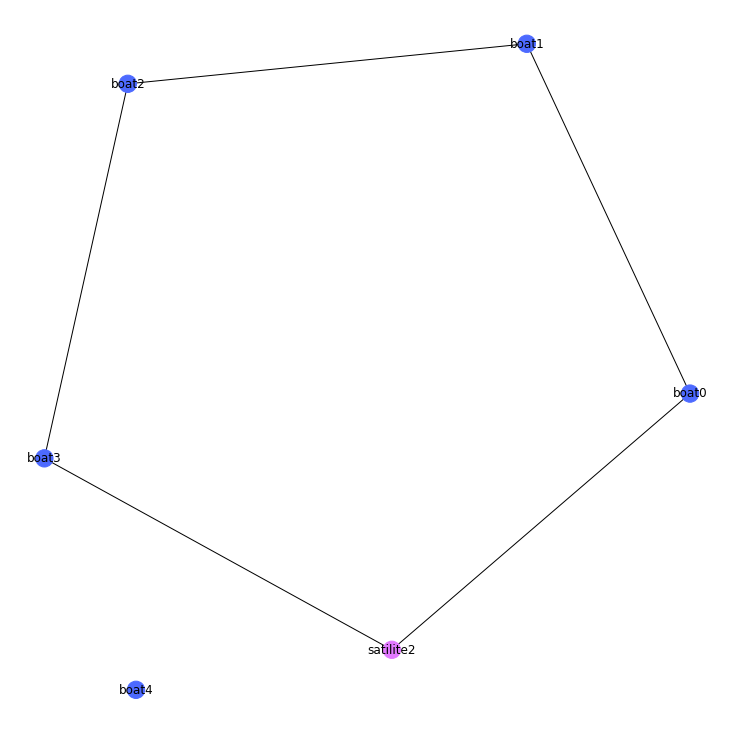

In [179]:
vdes.remove_node("satilite0")
vdes.remove_node("satilite1")
vdes.draw()

Her har vi da fått en ring-graf med en båt liggende utenfor rekkevidde av kommunikasjon. Dette er selvfølgelig katastrofalt for båten som nå ikke har noen form for navigasjon eller informasjon fra utsiden. Men rent grafisk er det et lovende resultat. Å miste de to mest sentrale satelittene, og fortsatt ha kommunkasjon med 83.3% av nodene er svært robust.

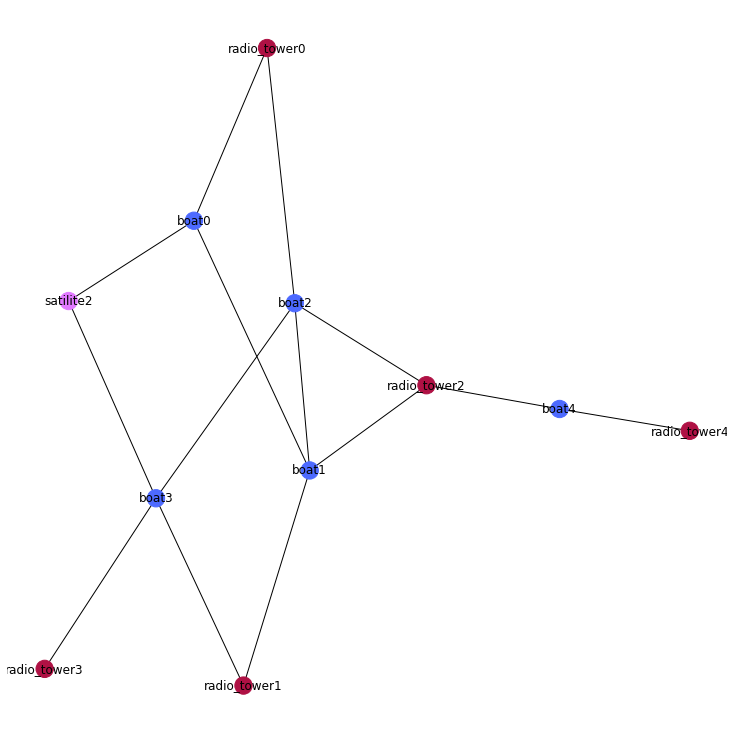

In [180]:
vd = VDESGraph(boat_count,satellite_count,radio_tower_count)
vd.remove_node("satilite0")
vd.remove_node("satilite1")
vd.draw()

Hvis vi setter i verk det tiltaket med å redusere bruken av radiotårn ville det være et robust system, der "boat4" fortsatt kunne kommunisere nød til land og dermed være trygg.

Et slikt nettverk vil kunne være svært robust mot sannsynlige angrep mot den fysiske infrastrukturen til VDES. At en da faser ut av slike trusler betyr også at digitale angrep blir mer sannsynlige, så en må derfor være bevisst på å sørge for at spesielt satelitter har sterke brannmurer mot dårlig pakker, og at de tåler belastningen som tårnene tok seg av.